In [1]:
!pip install scikit-optimize

     |████████████████████████████████| 100 kB 3.0 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import statistics as st
import itertools as it
import pickle as pkl

import scipy
import joblib
import math
import os
import re

import operator
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

import seaborn as sns
plt.style.use('ggplot')

In [4]:
import sklearn
sklearn.__version__

'1.0.1'

In [5]:
#!pip uninstall scikit-learn -y
#!pip install scikit-learn==0.18.2

In [6]:
#from sklearn.utils.fixes import MaskedArray
# replaced by
from numpy.ma import MaskedArray

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import VarianceThreshold

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, auc
from sklearn.metrics import fbeta_score, make_scorer

from xgboost.sklearn import XGBRegressor

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb
from xgboost import plot_importance
from xgboost import plot_tree

from graphviz import Graph

from scipy.stats import norm

In [8]:
from skopt.space import Real, Categorical, Integer
from skopt.space import Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt import BayesSearchCV

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
MLdf = pd.read_pickle('/content/drive/MyDrive/ColabNotebooks/Fourth_Pass: Ale_DataBase/no-f-matminer-FeaturedData_complete2.pkl')
MLdf.head(5)

,crossings_+-1eV,density,vpa,ewald_energy_per_atom,structural complexity per cell,MagpieData minimum Number,MagpieData maximum Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData minimum NsValence,MagpieData maximum NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData maximum NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData minimum NdUnfilled,MagpieData maximum NdUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData maximum GSbandgap,MagpieData maximum GSmagmom,HOMO_character,LUMO_character,MagpieData minimum GSbandgap MagpieData maximum GSbandgap,MagpieData minimum NUnfilled MagpieData maximum NUnfilled,MagpieData minimum NdUnfilled MagpieData maximum NdUnfilled,MagpieData minimum NpUnfilled MagpieData maximum NpUnfilled,MagpieData minimum NValence MagpieData maximum NValence,MagpieData minimum NdValence MagpieData maximum NdValence,MagpieData minimum NpValence MagpieData maximum NpValence,MagpieData minimum NsValence MagpieData maximum NsValence,MagpieData minimum Electronegativity MagpieData maximum Electronegativity,MagpieData minimum CovalentRadius MagpieData maximum CovalentRadius,MagpieData minimum Row MagpieData maximum Row,MagpieData minimum Column MagpieData maximum Column,MagpieData minimum MeltingT MagpieData maximum MeltingT,MagpieData minimum AtomicWeight MagpieData maximum AtomicWeight,MagpieData minimum MendeleevNumber MagpieData maximum MendeleevNumber,MagpieData minimum Number MagpieData maximum Number
0,0.0,2.833639,15.414612,-9.397323,15.709506,9.0,22.0,2.0,93.0,18.998403,47.867000,53.50,1941.00,1.0,17.0,2.0,4.0,57.0,203.0,0.82,3.98,1.0,5.0,0.0,2.0,1.0,7.0,1.0,0.0,1.0,0.0,8.0,1.0,8.0,1.97,0.000023,0.0,0.0,0.0,8.0,0.0,0.0,7.0,0.0,0.0,2.0,3.2636,11571.0,8.0,17.0,1.038435e+05,909.396566,186.0,198.0
1,0.0,3.199327,15.019607,0.000000,15.709506,9.0,46.0,2.0,93.0,18.998403,106.420000,53.50,1828.05,1.0,17.0,2.0,5.0,57.0,166.0,0.93,3.98,0.0,5.0,0.0,10.0,1.0,10.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.97,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,3.7014,9462.0,10.0,17.0,9.780068e+04,2021.810069,186.0,414.0
2,8.0,8.595556,22.805898,0.000000,6.000000,20.0,79.0,7.0,66.0,40.078000,196.966569,1115.00,2041.40,2.0,11.0,4.0,6.0,136.0,176.0,1.00,2.54,1.0,0.0,0.0,10.0,2.0,25.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.00,0.000000,2.0,2.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,2.0,2.5400,23936.0,24.0,22.0,2.276161e+06,7894.026152,462.0,1580.0
3,2.0,13.370065,19.145765,-4.347833,6.000000,47.0,79.0,65.0,75.0,107.868200,196.966569,429.75,1337.33,11.0,13.0,5.0,6.0,136.0,145.0,1.78,2.54,1.0,1.0,10.0,10.0,11.0,25.0,1.0,0.0,5.0,0.0,0.0,1.0,5.0,0.00,0.000000,2.0,2.0,0.0,5.0,0.0,0.0,275.0,100.0,0.0,2.0,4.5212,19720.0,30.0,143.0,5.747176e+05,21246.429258,4875.0,3713.0
4,26.0,7.401171,13.998991,0.000000,6.000000,22.0,43.0,43.0,55.0,47.867000,98.000000,1811.00,2430.00,4.0,8.0,4.0,5.0,132.0,160.0,1.54,1.90,2.0,0.0,2.0,6.0,4.0,8.0,0.0,0.0,0.0,4.0,8.0,4.0,8.0,0.00,2.110663,2.0,2.0,0.0,32.0,32.0,0.0,32.0,12.0,0.0,4.0,2.9260,21120.0,20.0,32.0,4.400730e+06,4690.966000,2365.0,946.0


In [12]:
MLdf.isnull().sum()

crossings_+-1eV                                                              0
density                                                                      0
vpa                                                                          0
ewald_energy_per_atom                                                        0
structural complexity per cell                                               0
MagpieData minimum Number                                                    0
MagpieData maximum Number                                                    0
MagpieData minimum MendeleevNumber                                           0
MagpieData maximum MendeleevNumber                                           0
MagpieData minimum AtomicWeight                                              0
MagpieData maximum AtomicWeight                                              0
MagpieData minimum MeltingT                                                  0
MagpieData maximum MeltingT                         

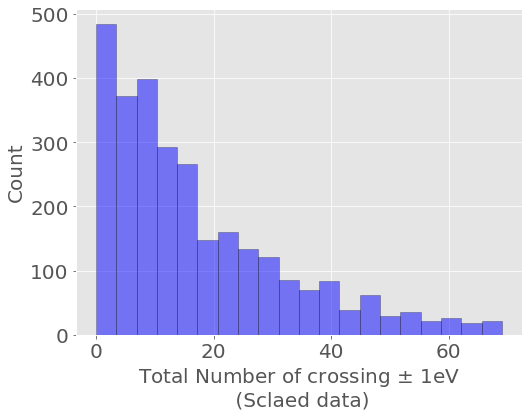

In [13]:
fig, ax = plt.subplots(figsize =(8, 6))
plt.hist(MLdf['crossings_+-1eV'], 
         color = 'blue', 
         edgecolor = 'black',
         bins = 20, alpha=0.5)

plt.xlabel('Total Number of crossing $\pm$ 1eV\n (Sclaed data)', fontsize = 20)
plt.ylabel('Count', fontsize = 20)

plt.tick_params(axis='both', labelsize = 20)

In [14]:
MLdf.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [15]:
len(MLdf.columns)

54

In [16]:
#preview the df
MLdf = MLdf.loc[:,~MLdf.columns.duplicated()]
MLdf.head(5)

,crossings_+-1eV,density,vpa,ewald_energy_per_atom,structural complexity per cell,MagpieData minimum Number,MagpieData maximum Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData minimum NsValence,MagpieData maximum NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData maximum NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData minimum NdUnfilled,MagpieData maximum NdUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData maximum GSbandgap,MagpieData maximum GSmagmom,HOMO_character,LUMO_character,MagpieData minimum GSbandgap MagpieData maximum GSbandgap,MagpieData minimum NUnfilled MagpieData maximum NUnfilled,MagpieData minimum NdUnfilled MagpieData maximum NdUnfilled,MagpieData minimum NpUnfilled MagpieData maximum NpUnfilled,MagpieData minimum NValence MagpieData maximum NValence,MagpieData minimum NdValence MagpieData maximum NdValence,MagpieData minimum NpValence MagpieData maximum NpValence,MagpieData minimum NsValence MagpieData maximum NsValence,MagpieData minimum Electronegativity MagpieData maximum Electronegativity,MagpieData minimum CovalentRadius MagpieData maximum CovalentRadius,MagpieData minimum Row MagpieData maximum Row,MagpieData minimum Column MagpieData maximum Column,MagpieData minimum MeltingT MagpieData maximum MeltingT,MagpieData minimum AtomicWeight MagpieData maximum AtomicWeight,MagpieData minimum MendeleevNumber MagpieData maximum MendeleevNumber,MagpieData minimum Number MagpieData maximum Number
0,0.0,2.833639,15.414612,-9.397323,15.709506,9.0,22.0,2.0,93.0,18.998403,47.867000,53.50,1941.00,1.0,17.0,2.0,4.0,57.0,203.0,0.82,3.98,1.0,5.0,0.0,2.0,1.0,7.0,1.0,0.0,1.0,0.0,8.0,1.0,8.0,1.97,0.000023,0.0,0.0,0.0,8.0,0.0,0.0,7.0,0.0,0.0,2.0,3.2636,11571.0,8.0,17.0,1.038435e+05,909.396566,186.0,198.0
1,0.0,3.199327,15.019607,0.000000,15.709506,9.0,46.0,2.0,93.0,18.998403,106.420000,53.50,1828.05,1.0,17.0,2.0,5.0,57.0,166.0,0.93,3.98,0.0,5.0,0.0,10.0,1.0,10.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.97,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,3.7014,9462.0,10.0,17.0,9.780068e+04,2021.810069,186.0,414.0
2,8.0,8.595556,22.805898,0.000000,6.000000,20.0,79.0,7.0,66.0,40.078000,196.966569,1115.00,2041.40,2.0,11.0,4.0,6.0,136.0,176.0,1.00,2.54,1.0,0.0,0.0,10.0,2.0,25.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.00,0.000000,2.0,2.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,2.0,2.5400,23936.0,24.0,22.0,2.276161e+06,7894.026152,462.0,1580.0
3,2.0,13.370065,19.145765,-4.347833,6.000000,47.0,79.0,65.0,75.0,107.868200,196.966569,429.75,1337.33,11.0,13.0,5.0,6.0,136.0,145.0,1.78,2.54,1.0,1.0,10.0,10.0,11.0,25.0,1.0,0.0,5.0,0.0,0.0,1.0,5.0,0.00,0.000000,2.0,2.0,0.0,5.0,0.0,0.0,275.0,100.0,0.0,2.0,4.5212,19720.0,30.0,143.0,5.747176e+05,21246.429258,4875.0,3713.0
4,26.0,7.401171,13.998991,0.000000,6.000000,22.0,43.0,43.0,55.0,47.867000,98.000000,1811.00,2430.00,4.0,8.0,4.0,5.0,132.0,160.0,1.54,1.90,2.0,0.0,2.0,6.0,4.0,8.0,0.0,0.0,0.0,4.0,8.0,4.0,8.0,0.00,2.110663,2.0,2.0,0.0,32.0,32.0,0.0,32.0,12.0,0.0,4.0,2.9260,21120.0,20.0,32.0,4.400730e+06,4690.966000,2365.0,946.0


In [17]:
len(MLdf.columns)

54

In [18]:
X = MLdf.drop(['crossings_+-1eV'], axis=1)
X.head(5)

,density,vpa,ewald_energy_per_atom,structural complexity per cell,MagpieData minimum Number,MagpieData maximum Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData minimum NsValence,MagpieData maximum NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData maximum NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData minimum NdUnfilled,MagpieData maximum NdUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData maximum GSbandgap,MagpieData maximum GSmagmom,HOMO_character,LUMO_character,MagpieData minimum GSbandgap MagpieData maximum GSbandgap,MagpieData minimum NUnfilled MagpieData maximum NUnfilled,MagpieData minimum NdUnfilled MagpieData maximum NdUnfilled,MagpieData minimum NpUnfilled MagpieData maximum NpUnfilled,MagpieData minimum NValence MagpieData maximum NValence,MagpieData minimum NdValence MagpieData maximum NdValence,MagpieData minimum NpValence MagpieData maximum NpValence,MagpieData minimum NsValence MagpieData maximum NsValence,MagpieData minimum Electronegativity MagpieData maximum Electronegativity,MagpieData minimum CovalentRadius MagpieData maximum CovalentRadius,MagpieData minimum Row MagpieData maximum Row,MagpieData minimum Column MagpieData maximum Column,MagpieData minimum MeltingT MagpieData maximum MeltingT,MagpieData minimum AtomicWeight MagpieData maximum AtomicWeight,MagpieData minimum MendeleevNumber MagpieData maximum MendeleevNumber,MagpieData minimum Number MagpieData maximum Number
0,2.833639,15.414612,-9.397323,15.709506,9.0,22.0,2.0,93.0,18.998403,47.867000,53.50,1941.00,1.0,17.0,2.0,4.0,57.0,203.0,0.82,3.98,1.0,5.0,0.0,2.0,1.0,7.0,1.0,0.0,1.0,0.0,8.0,1.0,8.0,1.97,0.000023,0.0,0.0,0.0,8.0,0.0,0.0,7.0,0.0,0.0,2.0,3.2636,11571.0,8.0,17.0,1.038435e+05,909.396566,186.0,198.0
1,3.199327,15.019607,0.000000,15.709506,9.0,46.0,2.0,93.0,18.998403,106.420000,53.50,1828.05,1.0,17.0,2.0,5.0,57.0,166.0,0.93,3.98,0.0,5.0,0.0,10.0,1.0,10.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.97,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,3.7014,9462.0,10.0,17.0,9.780068e+04,2021.810069,186.0,414.0
2,8.595556,22.805898,0.000000,6.000000,20.0,79.0,7.0,66.0,40.078000,196.966569,1115.00,2041.40,2.0,11.0,4.0,6.0,136.0,176.0,1.00,2.54,1.0,0.0,0.0,10.0,2.0,25.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.00,0.000000,2.0,2.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,2.0,2.5400,23936.0,24.0,22.0,2.276161e+06,7894.026152,462.0,1580.0
3,13.370065,19.145765,-4.347833,6.000000,47.0,79.0,65.0,75.0,107.868200,196.966569,429.75,1337.33,11.0,13.0,5.0,6.0,136.0,145.0,1.78,2.54,1.0,1.0,10.0,10.0,11.0,25.0,1.0,0.0,5.0,0.0,0.0,1.0,5.0,0.00,0.000000,2.0,2.0,0.0,5.0,0.0,0.0,275.0,100.0,0.0,2.0,4.5212,19720.0,30.0,143.0,5.747176e+05,21246.429258,4875.0,3713.0
4,7.401171,13.998991,0.000000,6.000000,22.0,43.0,43.0,55.0,47.867000,98.000000,1811.00,2430.00,4.0,8.0,4.0,5.0,132.0,160.0,1.54,1.90,2.0,0.0,2.0,6.0,4.0,8.0,0.0,0.0,0.0,4.0,8.0,4.0,8.0,0.00,2.110663,2.0,2.0,0.0,32.0,32.0,0.0,32.0,12.0,0.0,4.0,2.9260,21120.0,20.0,32.0,4.400730e+06,4690.966000,2365.0,946.0


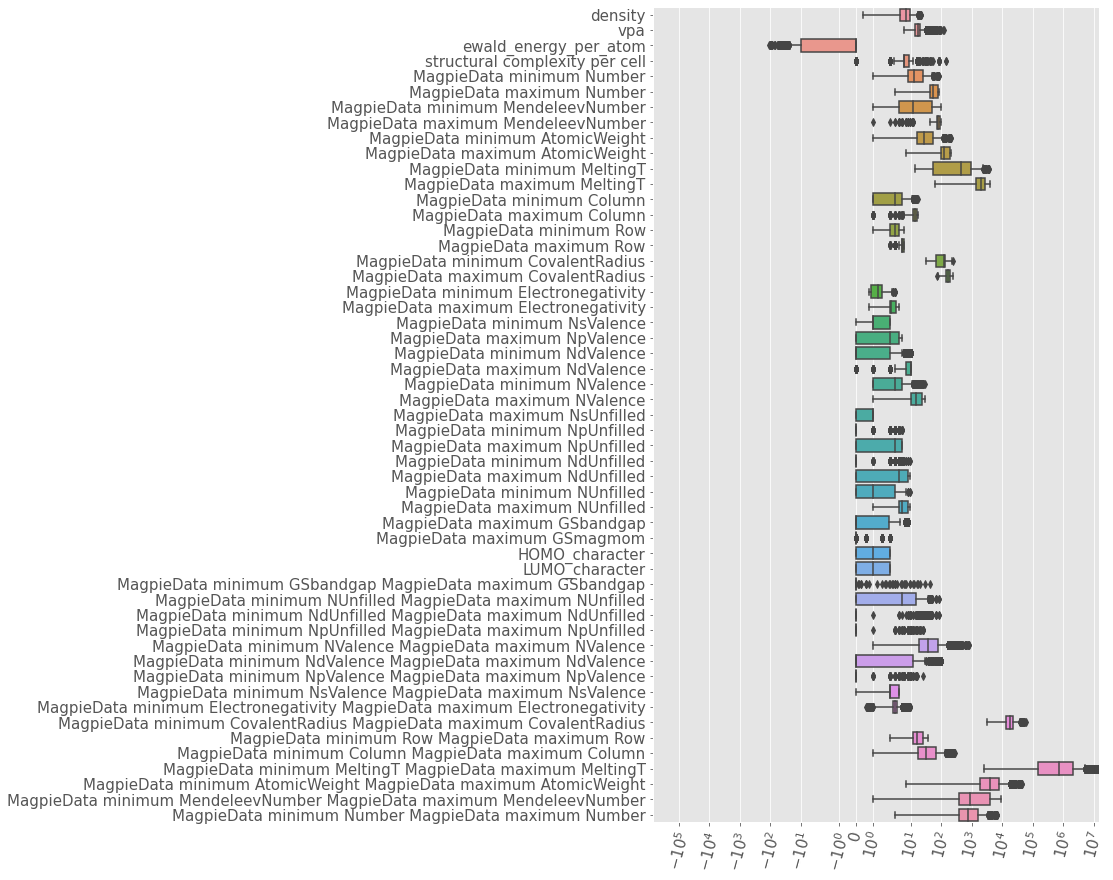

In [19]:
fig, ax = plt.subplots(figsize =(8, 15))
ax = sns.boxplot(data=X, orient='h')
plt.tick_params(axis='both', labelsize = 15)
plt.xscale('symlog')
plt.yticks(rotation=0)
plt.xticks(rotation=75);

In [20]:
Xscaled = RobustScaler(with_centering=True, 
                       with_scaling=True, 
                       quantile_range=(25.0, 75.0)
                       #with_mean=True, 
                       #with_std=True
                       ).fit_transform(X)
Xscaled

array([[-0.82916724, -0.20788349, -0.99082375, ..., -0.46605299,
        -0.19649022, -0.45172267],
       [-0.75599341, -0.26922918,  0.        , ..., -0.28737132,
        -0.19649022, -0.26797108],
       [ 0.32378745,  0.94000946,  0.        , ...,  0.65585472,
        -0.11708861,  0.72394726],
       ...,
       [ 0.25552863,  0.8215871 ,  0.        , ..., -0.29220357,
        -0.21029919, -0.24840493],
       [-0.04171691,  1.30198162,  0.        , ...,  0.1649666 ,
         0.44275029,  0.20331774],
       [-0.58603189,  0.16432651, -1.74765751, ..., -0.28742112,
         1.51409666, -0.25521055]])

In [21]:
np.std(Xscaled, axis=0)

array([7.26343642e-01, 1.49942196e+00, 1.52711248e+00, 3.42675686e+00,
       7.89710895e-01, 5.95284291e-01, 5.54704202e-01, 7.67913025e-01,
       8.19619645e-01, 5.76398001e-01, 7.72314321e-01, 6.47611344e-01,
       8.58986407e-01, 8.47576477e-01, 5.74100936e-01, 8.05523552e-01,
       5.02998121e-01, 6.36497160e-01, 6.27384036e-01, 6.65473022e-01,
       5.75218706e-01, 4.81622782e-01, 1.23223507e+00, 9.72975517e-01,
       8.81627377e-01, 5.65816102e-01, 4.85313941e-01, 5.74254974e-01,
       4.06717393e-01, 1.17565337e+00, 4.40080178e-01, 5.17882519e-01,
       6.07248950e-01, 9.36122816e-01, 8.96356462e+04, 4.30552928e-01,
       4.45400252e-01, 1.20877957e+00, 7.73499891e-01, 8.99251196e+00,
       2.61275035e+00, 1.42221394e+00, 2.01958940e+00, 1.51769540e+00,
       5.84357930e-01, 1.17107810e+00, 6.92250967e-01, 5.83704301e-01,
       1.08451440e+00, 1.10764089e+00, 9.67391165e-01, 5.89427916e-01,
       8.60091720e-01])

In [22]:
np.mean(Xscaled, axis=0)

array([ 7.96128693e-02,  3.96010548e-01, -8.43848404e-01,  1.01040469e+00,
        2.94035606e-01,  1.64328493e-01,  3.60742223e-01, -4.78969390e-02,
        3.20371084e-01,  1.63232371e-01,  2.44629205e-01, -3.05867461e-03,
        2.18619247e-01, -2.02231520e-01,  7.28730823e-02,  2.88702929e-01,
       -1.93355250e-01,  5.41086728e-02, -3.01712866e-02,  3.14080407e-01,
        2.88702929e-01,  2.37099024e-02,  6.42782427e-01, -6.51092515e-01,
        1.68235704e-01,  9.32303401e-02, -3.79707113e-01,  1.05997211e-01,
       -1.13179916e-01,  3.72036262e-01,  1.30753138e-02,  1.48884240e-01,
        1.12011855e-01,  4.95090585e-01,  3.35867230e+04, -3.53905160e-02,
       -3.83542538e-03,  7.90450049e-02,  2.77777778e-01,  2.82845188e+00,
        4.69316597e-01,  4.84094937e-01,  9.97559275e-01,  2.55927476e-01,
        2.78940028e-01,  1.12507167e-01, -4.70597290e-03,  6.57833566e-02,
        4.14632729e-01,  4.54071807e-01,  3.16686994e-01,  3.77225762e-01,
        2.95622148e-01])

In [23]:
Xscaled_df = pd.DataFrame(data=Xscaled, columns=list(X))
Xscaled_df.head(5)

,density,vpa,ewald_energy_per_atom,structural complexity per cell,MagpieData minimum Number,MagpieData maximum Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData minimum NsValence,MagpieData maximum NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData maximum NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData minimum NdUnfilled,MagpieData maximum NdUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData maximum GSbandgap,MagpieData maximum GSmagmom,HOMO_character,LUMO_character,MagpieData minimum GSbandgap MagpieData maximum GSbandgap,MagpieData minimum NUnfilled MagpieData maximum NUnfilled,MagpieData minimum NdUnfilled MagpieData maximum NdUnfilled,MagpieData minimum NpUnfilled MagpieData maximum NpUnfilled,MagpieData minimum NValence MagpieData maximum NValence,MagpieData minimum NdValence MagpieData maximum NdValence,MagpieData minimum NpValence MagpieData maximum NpValence,MagpieData minimum NsValence MagpieData maximum NsValence,MagpieData minimum Electronegativity MagpieData maximum Electronegativity,MagpieData minimum CovalentRadius MagpieData maximum CovalentRadius,MagpieData minimum Row MagpieData maximum Row,MagpieData minimum Column MagpieData maximum Column,MagpieData minimum MeltingT MagpieData maximum MeltingT,MagpieData minimum AtomicWeight MagpieData maximum AtomicWeight,MagpieData minimum MendeleevNumber MagpieData maximum MendeleevNumber,MagpieData minimum Number MagpieData maximum Number
0,-0.829167,-0.207883,-0.990824,3.899048,-0.235294,-0.852941,-0.217391,0.789474,-0.205018,-0.784285,-0.428204,-0.071629,-0.50,0.75,-0.5,-1.0,-0.914286,0.673469,-0.765625,1.547826,0.0,0.75,0.0,-2.666667,-0.50,-0.615385,0.0,0.0,-0.4,0.0,0.500,0.000000,0.75,1.0,3.548556,-0.5,-0.5,0.0,0.200000,0.0,0.0,-0.506550,0.000000,0.0,0.0,0.160917,-0.720612,-0.666667,-0.312500,-0.307929,-0.466053,-0.196490,-0.451723
1,-0.755993,-0.269229,0.000000,3.899048,-0.235294,-0.147059,-0.217391,0.789474,-0.205018,-0.162816,-0.428204,-0.152211,-0.50,0.75,-0.5,0.0,-0.914286,-0.081633,-0.593750,1.547826,-1.0,0.75,0.0,0.000000,-0.50,-0.384615,0.0,0.0,-0.4,0.0,-0.500,-0.333333,-1.00,1.0,0.000000,-0.5,-0.5,0.0,-0.333333,0.0,0.0,-0.454148,0.000000,0.0,-1.0,0.593654,-0.944867,-0.500000,-0.312500,-0.311041,-0.287371,-0.196490,-0.267971
2,0.323787,0.940009,0.000000,0.000000,0.411765,0.823529,-0.108696,-0.631579,0.336336,0.798227,0.779872,0.000000,-0.25,-0.75,0.5,1.0,0.214286,0.122449,-0.484375,0.295652,0.0,-0.50,0.0,0.000000,-0.25,0.769231,0.0,0.0,-0.6,0.0,-0.375,-0.333333,-0.75,0.0,0.000000,0.5,0.5,0.0,-0.333333,0.0,0.0,0.244541,0.000000,0.0,0.0,-0.554315,0.594184,0.666667,-0.208333,0.810879,0.655855,-0.117089,0.723947
3,1.279163,0.371578,-0.458422,0.000000,2.000000,0.823529,1.152174,-0.157895,2.077285,0.798227,0.000000,-0.502308,2.00,-0.25,1.0,1.0,0.214286,-0.510204,0.734375,0.295652,0.0,-0.25,5.0,0.000000,2.00,0.769231,0.0,0.0,0.4,0.0,-0.500,0.000000,0.00,0.0,0.000000,0.5,0.5,0.0,0.000000,0.0,0.0,4.174672,8.333333,0.0,0.0,1.403974,0.145888,1.166667,2.312500,-0.065415,2.800587,1.152474,2.538494
4,0.084792,-0.427735,0.000000,0.000000,0.529412,-0.235294,0.673913,-1.210526,0.536368,-0.252184,1.571978,0.277241,0.25,-1.50,0.5,0.0,0.157143,-0.204082,0.359375,-0.260870,1.0,-0.50,1.0,-1.333333,0.25,-0.538462,-1.0,0.0,-0.6,4.0,0.500,1.000000,0.75,0.0,332387.842520,0.5,0.5,0.0,1.800000,32.0,0.0,-0.069869,1.000000,0.0,1.0,-0.172778,0.294753,0.333333,0.000000,1.905095,0.141362,0.430380,0.184602


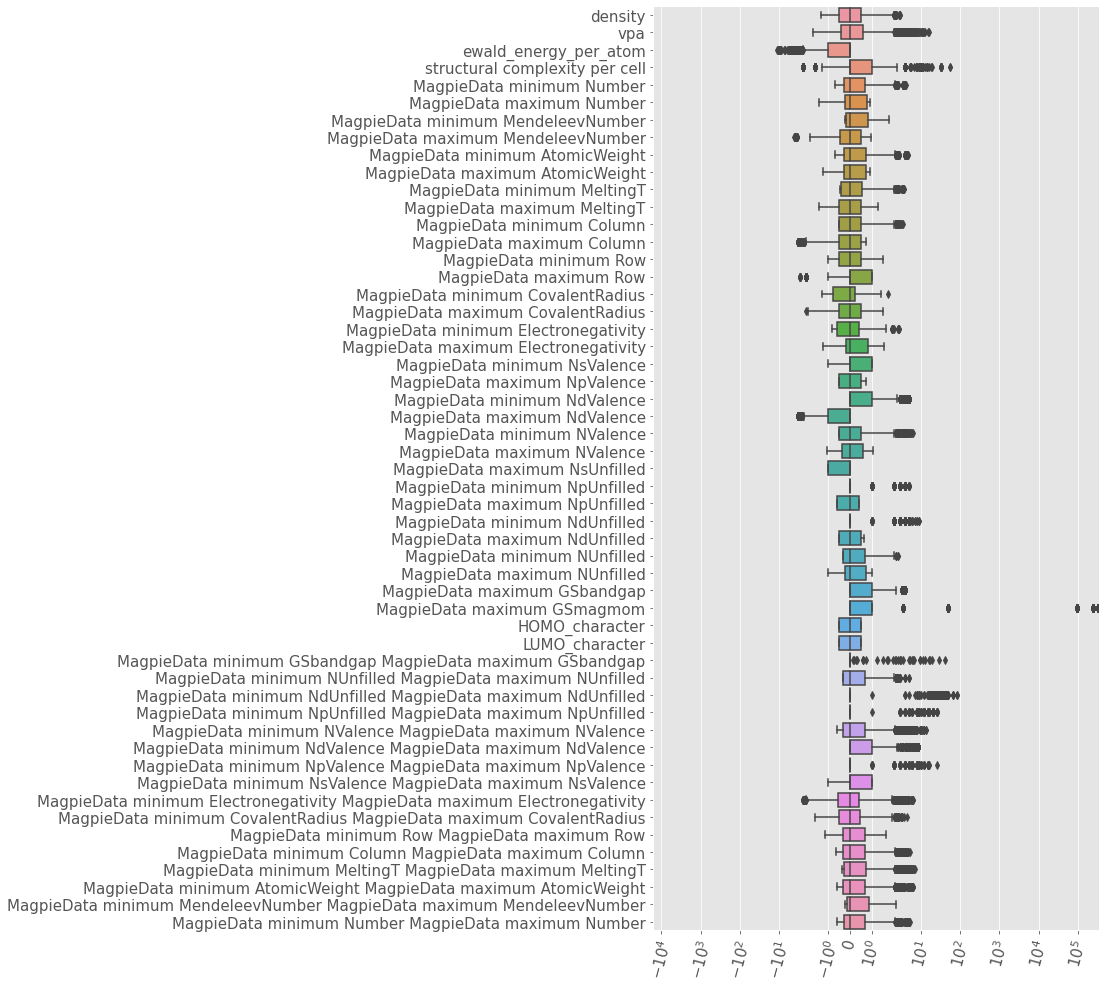

In [24]:
fig, ax = plt.subplots(figsize =(8, 17))
ax = sns.boxplot(data=Xscaled_df, orient='h')
plt.tick_params(axis='both', labelsize = 15)
plt.xscale('symlog')
plt.yticks(rotation=0)
plt.xticks(rotation=75);

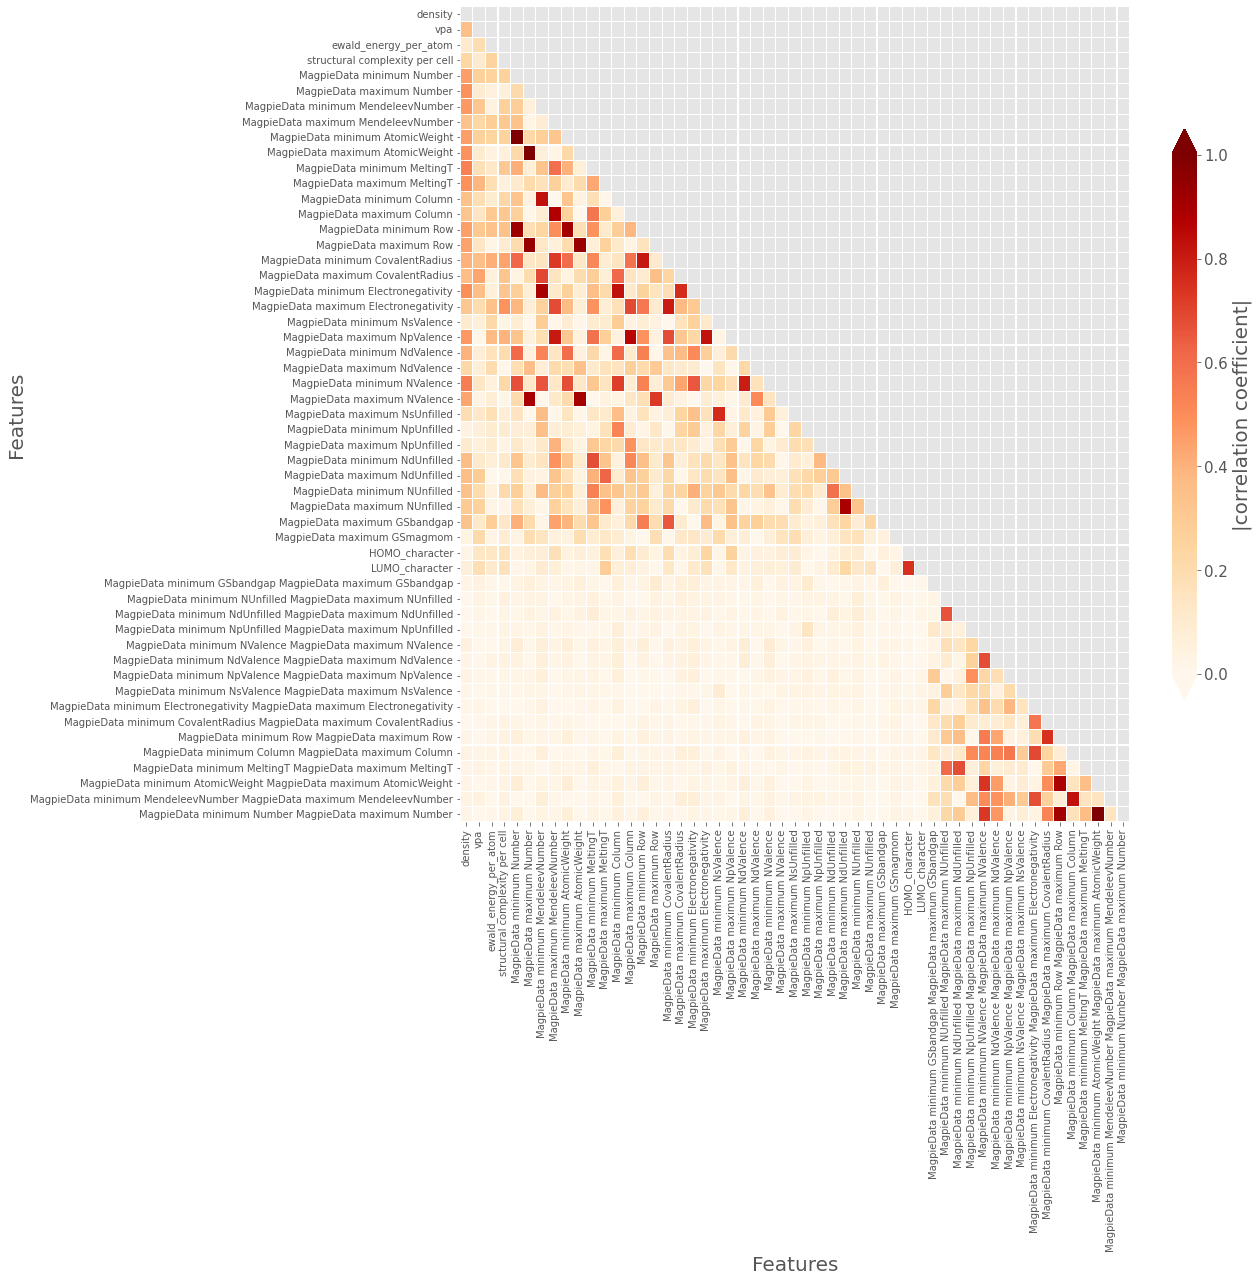

In [25]:
matrix = np.triu(Xscaled_df.corr(method ='pearson').abs())

f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(Xscaled_df.corr(method ='pearson').abs(), 
                 mask=matrix, 
                 cmap='OrRd', 
                 linecolor='white', 
                 linewidths=0.1, 
                 #annot=True, 
                 #annot_kws={'fontsize': 10, 
                       #'weight': 'bold'
                 #     }, 
                 #fmt='.2f', 
                 vmin=0, 
                 vmax=1, 
                 cbar_kws={'label': '|correlation coefficient|',  
                           'extend': 'both', 
                           'shrink':0.7}
                )

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
ax.figure.axes[-1].yaxis.label.set_size(20)

ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=10)

ax.set_ylabel('Features', fontsize = 20)
ax.set_xlabel('Features', fontsize = 20);
#f.savefig('Feature_Correlation.png', bbox_inches='tight', dpi=400);

In [26]:
y = MLdf['crossings_+-1eV']
y.head(5)

0     0.0
1     0.0
2     8.0
3     2.0
4    26.0
Name: crossings_+-1eV, dtype: float64

# PCA

In [27]:
pca = PCA()

In [28]:
param_grid = {'n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
                               11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 
                               21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 
                               31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
                               41, 42, 43, 44, 45, 46, 47, 48
                              ]}

In [29]:
search = GridSearchCV(pca, param_grid, n_jobs=-1)

In [30]:
search.fit(Xscaled_df, y)

GridSearchCV(estimator=PCA(), n_jobs=-1,
             param_grid={'n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [31]:
pca.fit(Xscaled_df)

PCA()

In [32]:
x_pca = pca.transform(Xscaled_df)

In [33]:
df_comp_n = pd.DataFrame(pca.components_, columns=Xscaled_df.columns)

In [34]:
df_comp_n.set_axis(['PC$_1$','PC$_2$','PC$_3$','PC$_4$','PC$_5$','PC$_6$','PC$_7$','PC$_8$','PC$_9$',
                           'PC$_{10}$','PC$_{11}$','PC$_{12}$','PC$_{13}$','PC$_{14}$','PC$_{15}$','PC$_{16}$','PC$_{17}$','PC$_{18}$','PC$_{19}$',
                           'PC$_{20}$','PC$_{21}$','PC$_{22}$','PC$_{23}$','PC$_{24}$','PC$_{25}$','PC$_{26}$','PC$_{27}$','PC$_{28}$','PC$_{29}$',
                           'PC$_{30}$','PC$_{31}$','PC$_{32}$','PC$_{33}$','PC$_{34}$','PC$_{35}$','PC$_{36}$','PC$_{37}$','PC$_{38}$','PC$_{39}$',
                           'PC$_{40}$','PC$_{41}$','PC$_{42}$','PC$_{43}$','PC$_{44}$','PC$_{45}$','PC$_{46}$','PC$_{47}$','PC$_{48}$','PC$_{49}$',
                           'PC$_{45}$','PC$_{51}$','PC$_{52}$','PC$_{53}$'
                          ], inplace=True)

In [35]:
df_comp_n

,density,vpa,ewald_energy_per_atom,structural complexity per cell,MagpieData minimum Number,MagpieData maximum Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData minimum NsValence,MagpieData maximum NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData maximum NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData minimum NdUnfilled,MagpieData maximum NdUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData maximum GSbandgap,MagpieData maximum GSmagmom,HOMO_character,LUMO_character,MagpieData minimum GSbandgap MagpieData maximum GSbandgap,MagpieData minimum NUnfilled MagpieData maximum NUnfilled,MagpieData minimum NdUnfilled MagpieData maximum NdUnfilled,MagpieData minimum NpUnfilled MagpieData maximum NpUnfilled,MagpieData minimum NValence MagpieData maximum NValence,MagpieData minimum NdValence MagpieData maximum NdValence,MagpieData minimum NpValence MagpieData maximum NpValence,MagpieData minimum NsValence MagpieData maximum NsValence,MagpieData minimum Electronegativity MagpieData maximum Electronegativity,MagpieData minimum CovalentRadius MagpieData maximum CovalentRadius,MagpieData minimum Row MagpieData maximum Row,MagpieData minimum Column MagpieData maximum Column,MagpieData minimum MeltingT MagpieData maximum MeltingT,MagpieData minimum AtomicWeight MagpieData maximum AtomicWeight,MagpieData minimum MendeleevNumber MagpieData maximum MendeleevNumber,MagpieData minimum Number MagpieData maximum Number
PC$_1$,2.962416e-07,-0.000004,4.650906e-07,0.000003,-2.660813e-07,-0.000001,8.998697e-07,-4.407891e-07,-3.627928e-07,-0.000001,7.465989e-07,8.833777e-07,8.289659e-07,-3.497482e-07,3.808242e-08,-0.000002,-5.329765e-08,-8.743738e-07,9.279202e-07,-6.951196e-07,0.000001,-3.957320e-07,0.000001,-1.727809e-08,7.072390e-07,-9.653382e-07,-9.817448e-07,-4.430988e-07,1.269140e-07,9.527855e-07,7.467850e-07,9.516709e-07,4.508299e-07,-5.246053e-07,1.000000e+00,-1.194671e-07,-3.273529e-07,-3.932650e-08,3.000383e-07,0.000002,-3.566215e-07,-2.788014e-07,-3.250779e-07,-4.083000e-07,1.240749e-07,4.882776e-07,-2.330217e-07,-1.495076e-07,2.399281e-07,2.063955e-07,-3.101676e-07,1.767355e-07,-2.640961e-07
PC$_2$,1.233760e-04,-0.003143,-9.488826e-04,-0.016190,1.303416e-03,-0.002348,1.147650e-03,-4.076647e-03,1.361223e-03,-0.002314,6.727161e-03,1.497226e-03,1.740425e-03,-4.120047e-03,1.495791e-03,-0.003431,2.061064e-03,-2.119644e-03,2.457482e-03,-3.485684e-03,0.000412,-1.918850e-03,0.001662,-2.788589e-03,6.348098e-04,-2.479276e-03,-3.896072e-04,1.288792e-03,-2.005460e-04,8.652635e-03,1.734411e-03,4.243262e-03,2.429207e-03,-4.180732e-04,-2.181542e-06,-1.481600e-04,-7.265783e-04,-3.111201e-03,5.703832e-02,0.992420,-1.755111e-02,2.383096e-02,5.753062e-03,-9.548772e-03,8.751496e-03,-7.094416e-03,2.152805e-02,2.357754e-02,-1.431875e-02,8.429479e-02,3.168053e-02,-3.948277e-04,2.896895e-02
PC$_3$,-6.869303e-02,-0.044208,-1.382287e-01,0.910028,-8.871489e-02,0.005630,-5.561336e-02,8.962051e-02,-9.004759e-02,0.005634,-9.019941e-02,6.150537e-04,-7.629109e-02,9.723974e-02,-7.857417e-02,0.018197,-7.879754e-02,6.768854e-02,-7.023178e-02,1.077001e-01,-0.011156,6.714537e-02,-0.114479,-3.829133e-03,-8.602759e-02,6.337555e-04,1.666523e-02,-1.911893e-02,7.636995e-03,-7.098695e-02,-8.597213e-03,-4.208757e-02,-1.293772e-02,6.153630e-02,-2.490102e-06,-1.949894e-02,-1.798203e-02,-7.438571e-03,-8.120707e-03,0.019811,-9.850447e-02,-5.058423e-02,-7.804366e-02,-4.180386e-02,-5.863688e-03,-2.049282e-02,-1.625936e-03,-1.113876e-02,-4.218939e-02,-3.118187e

Text(183.7, 0.5, 'PCA Features')

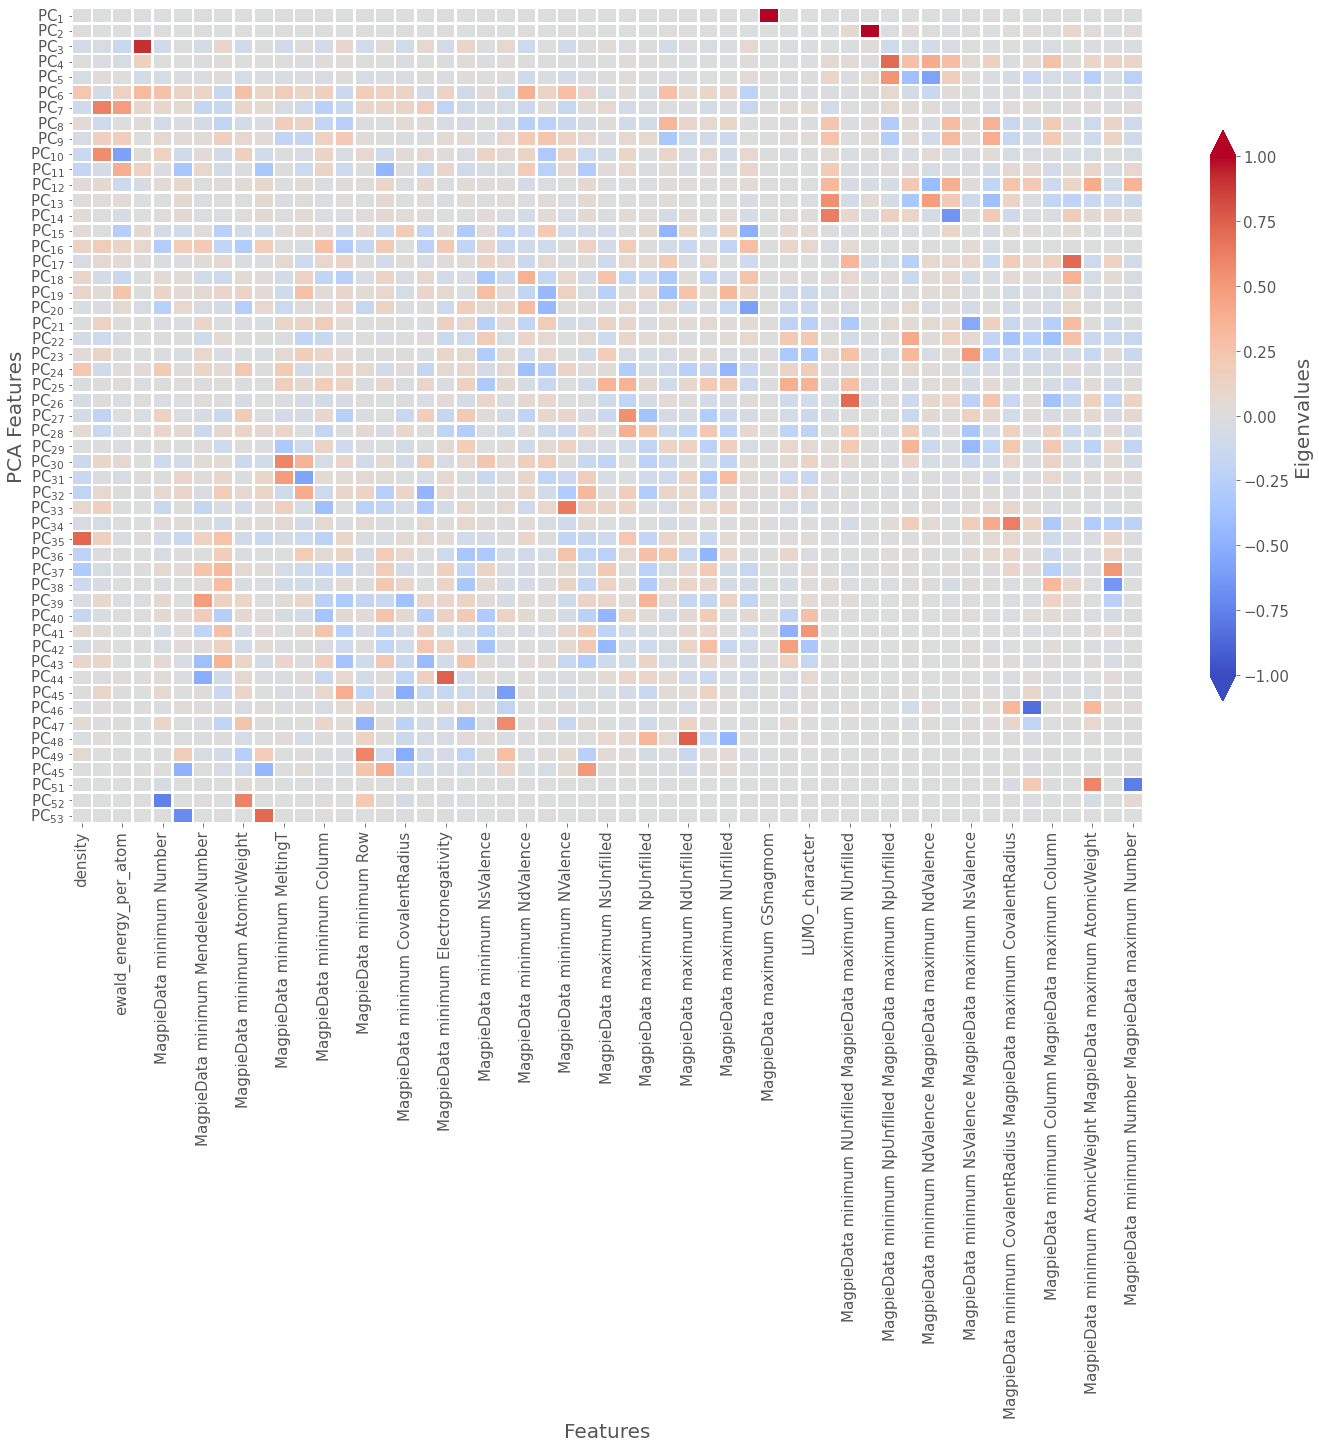

In [94]:
f, ax = plt.subplots(figsize=(24, 15))
ax = sns.heatmap(df_comp_n, 
            cmap='coolwarm', 
            linecolor='white', 
            linewidths=1.5, 
            #annot=True, 
            #annot_kws={'fontsize': 12, 
            #           #'weight': 'bold'
            #          }, 
            #fmt='.2f', 
            vmin=-1.00, 
            vmax= 1.00, 
            cbar_kws={'label': 'Eigenvalues', 'extend': 'both', 'shrink':0.7}, 
            yticklabels = ['PC$_1$','PC$_2$','PC$_3$','PC$_4$','PC$_5$','PC$_6$','PC$_7$','PC$_8$','PC$_9$',
                           'PC$_{10}$','PC$_{11}$','PC$_{12}$','PC$_{13}$','PC$_{14}$','PC$_{15}$','PC$_{16}$','PC$_{17}$','PC$_{18}$','PC$_{19}$',
                           'PC$_{20}$','PC$_{21}$','PC$_{22}$','PC$_{23}$','PC$_{24}$','PC$_{25}$','PC$_{26}$','PC$_{27}$','PC$_{28}$','PC$_{29}$',
                           'PC$_{30}$','PC$_{31}$','PC$_{32}$','PC$_{33}$','PC$_{34}$','PC$_{35}$','PC$_{36}$','PC$_{37}$','PC$_{38}$','PC$_{39}$',
                           'PC$_{40}$','PC$_{41}$','PC$_{42}$','PC$_{43}$','PC$_{44}$','PC$_{45}$','PC$_{46}$','PC$_{47}$','PC$_{48}$','PC$_{49}$',
                           'PC$_{45}$','PC$_{51}$','PC$_{52}$','PC$_{53}$'
                          ]
           )

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
ax.figure.axes[-1].yaxis.label.set_size(20)

ax = plt.gca()
#ax.axes.xaxis.set_visible(False)
ax.yaxis.set_tick_params(labelsize=15, labelrotation=0)
ax.xaxis.set_tick_params(labelsize=15, labelrotation=90)
plt.xlabel('Features', fontsize=20)
plt.ylabel('PCA Features', fontsize=20)
#f.savefig('PCA_Eigenvectors_DeltaE.png', bbox_inches='tight', dpi=400);

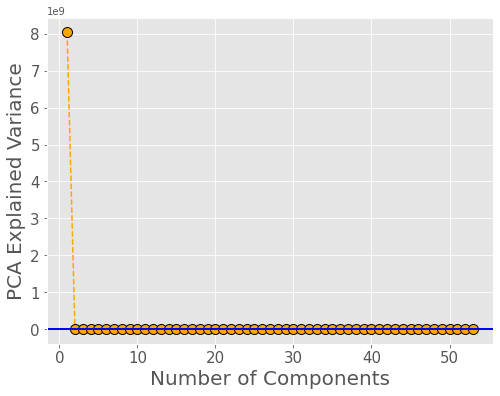

In [37]:
fig, (ax0) = plt.subplots(figsize=(8, 6))

ax0.plot(np.arange(1, pca.n_components_ + 1), 
         pca.explained_variance_,  
         '--o', 
         color='orange', 
         markersize=10, 
         markeredgecolor='k'
        )
ax0.axhline(y=1, linewidth=2, color='b')
ax0.xaxis.set_tick_params(labelsize=15)
ax0.yaxis.set_tick_params(labelsize=15)

ax0.set_xlabel('Number of Components', fontsize = 20)
ax0.set_ylabel('PCA Explained Variance', fontsize = 20);

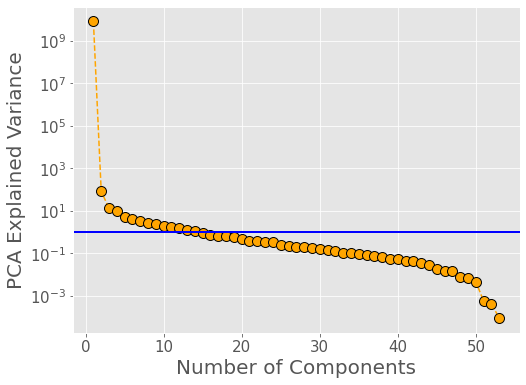

In [38]:
fig, (ax0) = plt.subplots(figsize=(8, 6))

ax0.plot(np.arange(1, pca.n_components_ + 1), 
         pca.explained_variance_, 
         '--o', 
         color='orange', 
         markersize=10, 
         markeredgecolor='k'
        )
ax0.axhline(y=1, linewidth=2, color='b')
ax0.xaxis.set_tick_params(labelsize=15)
ax0.yaxis.set_tick_params(labelsize=15)
ax0.set_yscale('log')
ax0.set_xlabel('Number of Components', fontsize = 20)
ax0.set_ylabel('PCA Explained Variance', fontsize = 20);

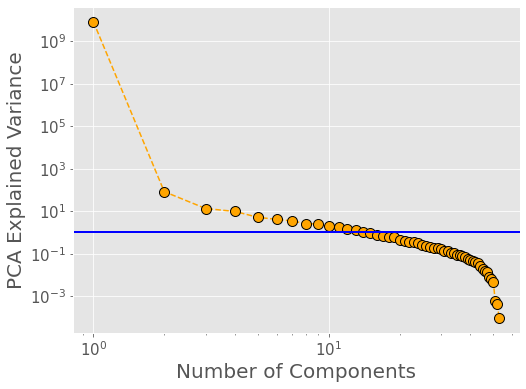

In [39]:
fig, (ax0) = plt.subplots(figsize=(8, 6))

ax0.plot(np.arange(1, pca.n_components_ + 1), 
         pca.explained_variance_, 
         '--o', 
         color='orange', 
         markersize=10, 
         markeredgecolor='k'
        )
ax0.axhline(y=1, linewidth=2, color='b')
ax0.xaxis.set_tick_params(labelsize=15)
ax0.yaxis.set_tick_params(labelsize=15)
ax0.set_yscale('log')
ax0.set_xscale('log')
ax0.set_xlabel('Number of Components', fontsize = 20)
ax0.set_ylabel('PCA Explained Variance', fontsize = 20);

In [40]:
df_x_pca = pd.DataFrame(x_pca, 
                        columns=['PC$_1$','PC$_2$','PC$_3$','PC$_4$','PC$_5$','PC$_6$','PC$_7$','PC$_8$','PC$_9$',
                           'PC$_{10}$','PC$_{11}$','PC$_{12}$','PC$_{13}$','PC$_{14}$','PC$_{15}$','PC$_{16}$','PC$_{17}$','PC$_{18}$','PC$_{19}$',
                           'PC$_{20}$','PC$_{21}$','PC$_{22}$','PC$_{23}$','PC$_{24}$','PC$_{25}$','PC$_{26}$','PC$_{27}$','PC$_{28}$','PC$_{29}$',
                           'PC$_{30}$','PC$_{31}$','PC$_{32}$','PC$_{33}$','PC$_{34}$','PC$_{35}$','PC$_{36}$','PC$_{37}$','PC$_{38}$','PC$_{39}$',
                           'PC$_{40}$','PC$_{41}$','PC$_{42}$','PC$_{43}$','PC$_{44}$','PC$_{45}$','PC$_{46}$','PC$_{47}$','PC$_{48}$','PC$_{49}$',
                           'PC$_{45}$','PC$_{51}$','PC$_{52}$','PC$_{53}$']
                       )
df_x_pca.head(5)

,PC$_1$,PC$_2$,PC$_3$,PC$_4$,PC$_5$,PC$_6$,PC$_7$,PC$_8$,PC$_9$,PC$_{10}$,PC$_{11}$,PC$_{12}$,PC$_{13}$,PC$_{14}$,PC$_{15}$,PC$_{16}$,PC$_{17}$,PC$_{18}$,PC$_{19}$,PC$_{20}$,PC$_{21}$,PC$_{22}$,PC$_{23}$,PC$_{24}$,PC$_{25}$,PC$_{26}$,PC$_{27}$,PC$_{28}$,PC$_{29}$,PC$_{30}$,PC$_{31}$,PC$_{32}$,PC$_{33}$,PC$_{34}$,PC$_{35}$,PC$_{36}$,PC$_{37}$,PC$_{38}$,PC$_{39}$,PC$_{40}$,PC$_{41}$,PC$_{42}$,PC$_{43}$,PC$_{44}$,PC$_{45}$,PC$_{46}$,PC$_{47}$,PC$_{48}$,PC$_{49}$,PC$_{45}$,PC$_{51}$,PC$_{52}$,PC$_{53}$
0,-33583.174458,-2.950095,4.007401,-1.019406,1.443703,-1.473042,-0.559243,0.694392,-0.475275,0.295502,1.742785,-0.951460,-0.060912,-0.423864,-0.801988,-1.658738,-0.509579,0.032470,1.206798,0.802919,0.127202,0.121852,0.255776,-0.028654,0.514188,0.318743,0.163379,-0.129751,0.116645,-0.315597,0.385544,0.274256,0.120945,0.013460,0.137767,-0.267753,-0.269892,0.008544,0.020201,-0.203762,0.069393,0.021996,-0.073869,-0.118571,0.051234,0.072236,0.056074,-0.014795,-0.090275,0.083465,-0.006193,0.000827,0.008771
1,-33586.723020,-3.002440,3.866676,-1.027815,1.157827,-0.930303,0.097248,-0.175839,0.900820,-1.374768,0.851101,-0.957589,0.091957,-0.303643,-1.023393,-0.804067,-0.845582,-0.025502,-0.812708,0.333340,1.547006,-0.148623,-0.039277,0.569924,-0.149288,0.512803,0.439941,0.240713,0.036462,0.134245,-0.311312,0.273920,0.065702,-0.283006,-0.127235,0.154329,-0.208074,0.069541,-0.171975,0.499556,-0.118958,0.127251,0.346962,-0.001197,0.084189,-0.074682,0.078122,0.086405,0.142886,-0.039817,-0.003068,-0.012462,-0.001771
2,-33586.723039,-2.674057,-0.892907,-1.455719,-0.005903,0.105813,1.696930,-0.367674,-0.544871,-1.070710,-0.729327,1.340540,0.003622,0.222918,0.462747,0.617439,0.056246,0.459487,-0.821564,-0.017618,0.213442,0.021622,-0.512096,0.838410,0.027853,-0.298801,0.463352,0.075423,-0.233438,0.424798,-0.064150,0.228439,-0.000986,0.305068,-0.243312,-0.210948,-0.097536,0.009379,-0.241264,-0.085297,-0.046757,-0.005537,0.012662,-0.020515,-0.015903,-0.185751,-0.369324,0.083487,0.068894,0.049236,-0.036520,-0.025805,-0.001447
3,-33586.723030,-2.495834,-3.288926,4.787911,-8.456081,2.485943,-0.586087,-2.084946,2.124472,0.527685,0.123023,-0.857977,0.803165,0.302891,-0.510514,0.083893,-1.210046,1.085331,-0.489250,0.236531,-0.620763,-0.284697,-0.871753,0.021248,0.446893,0.124470,-0.455250,-0.264937,-0.169399,-0.654678,0.280937,-0.084812,-0.529112,-0.057839,-0.024131,-0.229560,-0.335434,-0.252311,0.295377,-0.102108,-0.097292,-0.211888,0.259162,-0.056638,0.004576,0.156845,-0.022600,-0.114482,-0.084181,-0.032821,-0.027318,-0.006890,-0.003458
4,298801.119568,28.612830,-2.121713,-0.798761,1.152366,1.445395,0.831804,2.109086,-1.540496,0.600287,0.038694,-1.033150,0.924028,-0.532278,-1.070013,0.076855,0.109525,-1.002612,-0.756172,-0.078907,-0.724184,0.269255,-0.348541,-0.300382,0.216955,-0.161481,0.098063,-0.661185,0.194833,0.037322,0.003573,0.128800,-0.249444,0.031396,0.069983,0.268437,0.199259,0.011611,-0.020651,0.301328,-0.088659,-0.005707,0.020349,0.089957,0.042612,-0.067355,-0.056662,-0.020674,0.048022,-0.012658,0.024189,0.022308,-0.009675


Text(0.5, 110.2, 'Pincipal Components')

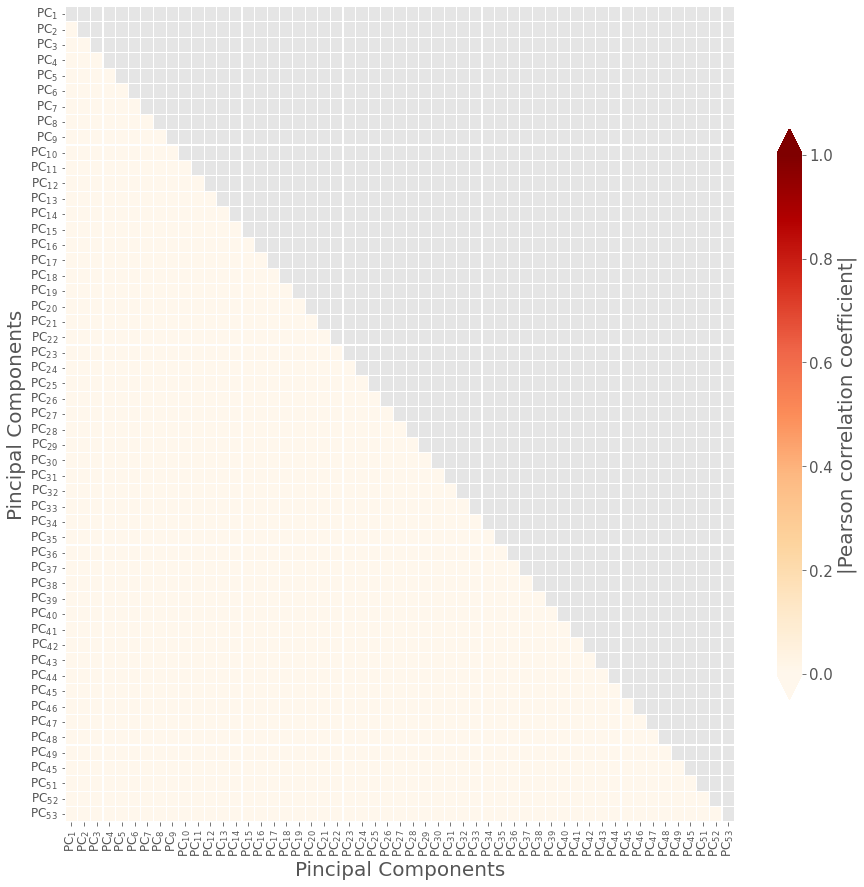

In [41]:
matrix = np.triu(df_x_pca.corr(method ='pearson').abs())

f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(df_x_pca.corr(method ='pearson').abs(), 
                 mask=matrix, 
                 cmap='OrRd', 
                 linecolor='white', 
                 linewidths=0.1, 
                 #annot=True, 
                 #annot_kws={'fontsize': 10, 
                       #'weight': 'bold'
                 #     }, 
                 #fmt='.2f', 
                 vmin=0, 
                 vmax=1, 
                 cbar_kws={'label': '|Pearson correlation coefficient|',  
                           'extend': 'both', 
                           'shrink':0.7}
                )

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
ax.figure.axes[-1].yaxis.label.set_size(20)

ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

ax.set_ylabel('Pincipal Components', fontsize = 20)
ax.set_xlabel('Pincipal Components', fontsize = 20)
#f.savefig('Feature_Correlation.png', bbox_inches='tight', dpi=400);

In [42]:
x_pca_13 = df_x_pca.iloc[:,0:13]
x_pca_13.head(5)

,PC$_1$,PC$_2$,PC$_3$,PC$_4$,PC$_5$,PC$_6$,PC$_7$,PC$_8$,PC$_9$,PC$_{10}$,PC$_{11}$,PC$_{12}$,PC$_{13}$
0,-33583.174458,-2.950095,4.007401,-1.019406,1.443703,-1.473042,-0.559243,0.694392,-0.475275,0.295502,1.742785,-0.951460,-0.060912
1,-33586.723020,-3.002440,3.866676,-1.027815,1.157827,-0.930303,0.097248,-0.175839,0.900820,-1.374768,0.851101,-0.957589,0.091957
2,-33586.723039,-2.674057,-0.892907,-1.455719,-0.005903,0.105813,1.696930,-0.367674,-0.544871,-1.070710,-0.729327,1.340540,0.003622
3,-33586.723030,-2.495834,-3.288926,4.787911,-8.456081,2.485943,-0.586087,-2.084946,2.124472,0.527685,0.123023,-0.857977,0.803165
4,298801.119568,28.612830,-2.121713,-0.798761,1.152366,1.445395,0.831804,2.109086,-1.540496,0.600287,0.038694,-1.033150,0.924028


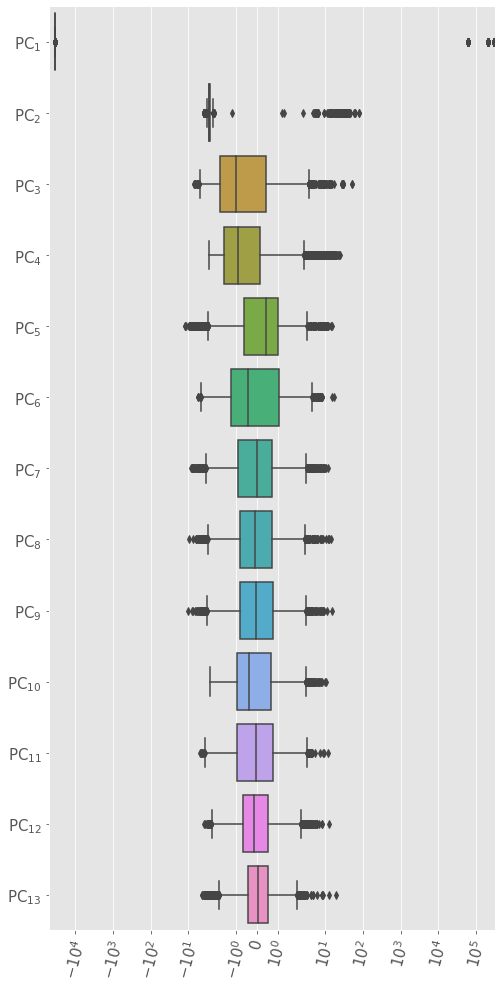

In [43]:
fig, ax = plt.subplots(figsize =(8, 17))
ax = sns.boxplot(data=x_pca_13, orient='h')
plt.tick_params(axis='both', labelsize = 15)
plt.xscale('symlog')
plt.yticks(rotation=0)
plt.xticks(rotation=75);

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x_pca_13, y, 
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    random_state=1
                                                   )

In [45]:
df_y_train = pd.DataFrame(y_train)
df_y_train.head(5)

,crossings_+-1eV
2108,28.0
1173,1.0
2249,0.0
619,0.0
1198,30.0


In [46]:
df_y_test = pd.DataFrame(y_test)
df_y_test.head(5)

,crossings_+-1eV
2204,12.0
2763,6.0
1732,6.0
592,39.0
2137,25.0


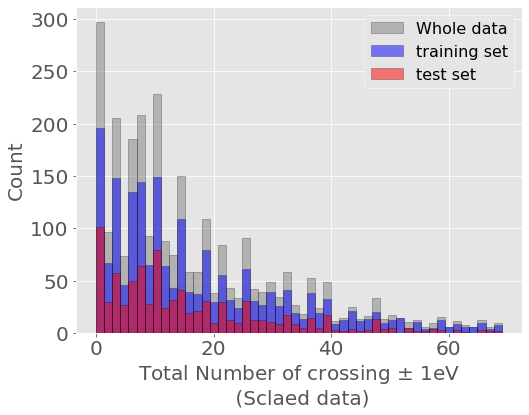

In [47]:
fig, ax = plt.subplots(figsize =(8, 6))
plt.hist(MLdf['crossings_+-1eV'], 
         color = 'grey', 
         edgecolor = 'black',
         bins = 50, 
         alpha=0.5, 
         label='Whole data')

plt.hist(y_train, 
         color = 'blue', 
         edgecolor = 'black',
         bins = 50, 
         alpha=0.5,
         label='training set')

plt.hist(y_test, 
         color = 'red', 
         edgecolor = 'black',
         bins = 50, 
         alpha=0.5, 
         label='test set')

plt.xlabel('Total Number of crossing $\pm$ 1eV\n (Sclaed data)', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.legend(loc='upper right', fontsize = 16, ncol = 1).get_frame().set_edgecolor('w')
plt.grid(True)

plt.tick_params(axis='both', labelsize = 20)

https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost

In [48]:
estimator = xgb.XGBRegressor()

print(estimator.get_params().keys())

param_grid   = {"booster":           ['gbtree'], 
                'objective':         ['reg:squarederror'],
                "learning_rate":     (0.01, 3.0, "uniform"),  
                "max_depth":         (1, 50, "uniform"), 
                "max_delta_step":    (0, 10.0, "uniform"), 
                "subsample":         (0.01, 1.0, "uniform"), 
                "colsample_bytree":  (0.01, 1.0, "uniform"), 
                "colsample_bylevel": (0.01, 1.0, "uniform"), 
                "reg_lambda":        (1, 1000, "uniform"), 
                "reg_alpha":         (1e-9, 3.0, "uniform"), 
                "gamma":             (1e-9, 3.0, "uniform"), 
                "min_child_weight":  (0, 10, "uniform"),  
                "scale_pos_weight":  (1, 500, "uniform")
                }

ss = ShuffleSplit(n_splits=7, test_size=0.30, random_state=0)

gbm = BayesSearchCV(estimator=estimator, 
                    search_spaces=param_grid, 
                    cv=ss, 
                    n_iter=150, 
                    n_points=10, 
                    optimizer_kwargs={'base_estimator': 'GBRT', 
                                      'acq_optimizer': 'sampling',
                                      'initial_point_generator':'grid'
                                      }, 
                    #iid=False, 
                    verbose=0, 
                    n_jobs=-1, 
                    refit=True)

gbm.fit(X_train, y_train)
best = gbm.best_estimator_;

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'importance_type', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity'])


In [49]:
# save the model to disk
pkl.dump(best, open('/content/drive/MyDrive/ColabNotebooks/Fourth_Pass: Ale_DataBase/ML_model.sav', 'wb'))

In [50]:
estimator.importance_type

'gain'

In [51]:
df0 = pd.DataFrame(gbm.cv_results_)
df0.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_booster,param_colsample_bylevel,param_colsample_bytree,param_gamma,param_learning_rate,param_max_delta_step,param_max_depth,param_min_child_weight,param_objective,param_reg_alpha,param_reg_lambda,param_scale_pos_weight,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.373367,0.041717,0.009190,0.000240,gbtree,0.505,0.7525,1.5,2.2525,8,38,5,reg:squarederror,0.75,500,126,0.505,"{'booster': 'gbtree', 'colsample_bylevel': 0.5...",-0.234705,-0.307380,-0.220145,-0.342632,-0.200570,-0.387351,-0.222058,-0.273549,0.066768,127
1,0.432288,0.018223,0.009946,0.002358,gbtree,0.7525,0.7525,1.5,0.7575,2,26,5,reg:squarederror,0.75,750,250,0.505,"{'booster': 'gbtree', 'colsample_bylevel': 0.7...",0.182873,0.236520,0.171015,0.125661,0.210958,0.182592,0.186395,0.185145,0.031751,8
2,0.280331,0.007130,0.009228,0.000609,gbtree,0.7525,0.505,0.75,1.505,5,38,2,reg:squarederror,2.25,251,375,0.2575,"{'booster': 'gbtree', 'colsample_bylevel': 0.7...",-0.713800,-0.579567,-0.903224,-0.750728,-0.326618,-0.558878,-0.450185,-0.611857,0.179651,135
3,0.146368,0.004325,0.007001,0.000156,gbtree,0.7525,0.2575,2.25,1.505,2,13,8,reg:squarederror,2.25,251,375,0.2575,"{'booster': 'gbtree', 'colsample_bylevel': 0.7...",-0.163327,-0.228000,-0.208299,-0.258178,-0.286133,-0.368180,-0.275730,-0.255407,0.060394,125
4,0.174905,0.004500,0.007104,0.000101,gbtree,0.505,0.505,0.75,0.7575,5,26,8,reg:squarederror,0.75,500,250,0.2575,"{'booster': 'gbtree', 'colsample_bylevel': 0.5...",0.104827,0.161518,0.119028,0.045615,0.140755,0.116642,0.105074,0.113351,0.033474,66


In [52]:
gbm.best_params_

OrderedDict([('booster', 'gbtree'),
             ('colsample_bylevel', 0.7407875862169556),
             ('colsample_bytree', 0.8264897419467259),
             ('gamma', 0.31243261075819717),
             ('learning_rate', 0.8394875424459604),
             ('max_delta_step', 4),
             ('max_depth', 11),
             ('min_child_weight', 4),
             ('objective', 'reg:squarederror'),
             ('reg_alpha', 2.9710507268423365),
             ('reg_lambda', 812),
             ('scale_pos_weight', 396),
             ('subsample', 0.6575779051598305)])

In [53]:
gbm.best_index_

62

In [54]:
gbm.n_splits_

7

In [55]:
gbm.multimetric_

False

The rmse train: 8.927050881173438
The rmse test: 12.795330207696834
The MAE train: 6.244417201955935
The MAE test: 9.619005904345839
The R^2 train: 0.6760008133543449
The R^2 test: 0.2213174461362828


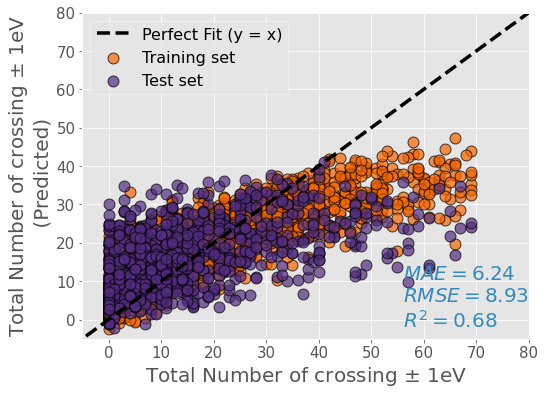

In [56]:
y_pred_train = best.predict(X_train)
y_pred_test = best.predict(X_test)

x_ref_line = [-10, 100]
y_ref_line = [-10, 100]

x_ref_line_2 = np.linspace(-10, 10, 100)
y_ref_line_2 = np.linspace(-10, 10, 100)

# Print Result and Output figure
x1 = np.array(y_train)
y1 = np.array(y_pred_train)
x2 = np.array(y_test)
y2 = np.array(y_pred_test)

print('The rmse train:', mean_squared_error(y_train, y_pred_train, squared=False))
print('The rmse test:', mean_squared_error(y_test, y_pred_test, squared=False))
print('The MAE train:', mean_absolute_error(y_train, y_pred_train))
print('The MAE test:', mean_absolute_error(y_test, y_pred_test))
print('The R^2 train:', r2_score(y_train, y_pred_train))
print('The R^2 test:', r2_score(y_test, y_pred_test))

fig = plt.figure(figsize=(8, 6))
#plt.fill_between(x_ref_line_2, y_ref_line_2 - 1.0, y_ref_line_2 + 1.0, 
#                 color = '#546223', alpha=0.3, label='+/- 1eV')

z = np.polyfit(x1, y1, 1)
p = np.poly1d(z)
plt.plot(x_ref_line, y_ref_line, 'k--', linewidth=3.5, label='Perfect Fit (y = x)')
#plt.plot(x1,p(x1),'--', color = 'dodgerblue', linewidth=3.5, label='Best Fit')

plt.scatter(x1, y1, s=120, c='#F56600', alpha=0.7, edgecolors='k', linewidths=1, label='Training set')
plt.scatter(x2, y2, s=120, c='#522D80', alpha=0.7, edgecolors='k', linewidths=1, label='Test set')

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Total Number of crossing $\pm$ 1eV', fontsize = 20)
plt.ylabel('Total Number of crossing $\pm$ 1eV \n (Predicted)', fontsize = 20)
plt.tick_params(axis='both', labelsize = 15)
plt.legend(loc='upper left', fontsize = 16, ncol = 1).get_frame().set_edgecolor('w')
plt.grid(True)

plt.xlim(-5, 80)
plt.ylim(-5, 80);
text_kwargs = dict(fontsize=20, 
                   #ha='center', 
                   #va='center', 
                   color='C1'
                  )

plt.text(56, -2, 
         (r'$MAE={:.2f}$' + '\n' + r'$RMSE={:.2f}$' + '\n' + r'$R^2={:.2f}$').format(mean_absolute_error(y_train, y_pred_train), 
                                                                                               mean_squared_error(y_train, y_pred_train, squared=False), 
                                                                                               r2_score(y_train, y_pred_train)
                                                                                              ), **text_kwargs
        );

In [57]:
residuals_training = [y_train_i - y_pred_train_i for y_train_i, y_pred_train_i in zip(y_train, y_pred_train)]
#error_training

In [58]:
residuals_testing = [y_test_i - y_pred_test_i for y_test_i, y_pred_test_i in zip(y_test, y_pred_test)]
#error_testing

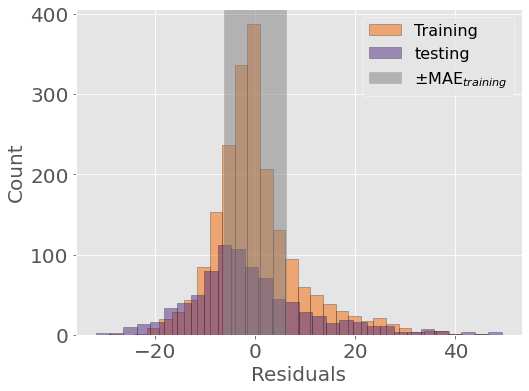

In [59]:
fig, ax = plt.subplots(figsize =(8, 6))

plt.hist(residuals_training, 
         color = '#F56600', 
         edgecolor = 'black',
         bins = 30, 
         alpha=0.5,
         label='Training')

plt.hist(residuals_testing, 
         color = '#522D80', 
         edgecolor = 'black',
         bins = 30, 
         alpha=0.5, 
         label='testing')

ax.axvspan(-mean_absolute_error(y_train, y_pred_train), 
            mean_absolute_error(y_train, y_pred_train), 
            alpha=0.5, 
            color='grey', 
            label='$\pm$MAE$_{training}$')

plt.legend(loc='upper right', fontsize = 16, ncol = 1).get_frame().set_edgecolor('w')
plt.xlabel('Residuals', fontsize = 20)
plt.ylabel('Count', fontsize = 20)

plt.tick_params(axis='both', labelsize = 20)

# Feature Importances

In [60]:
imp = pd.DataFrame(best.feature_importances_, 
                   columns = ['Importance'], 
                   index = x_pca_13.columns)

imp = imp.sort_values(['Importance'], ascending = False)
imp

,Importance
PC$_6$,0.150635
PC$_{10}$,0.127623
PC$_9$,0.122714
PC$_1$,0.084291
PC$_{12}$,0.081555
PC$_5$,0.077622
PC$_4$,0.064275
PC$_7$,0.060303
PC$_8$,0.058981
PC$_3$,0.055186


In [61]:
imp['Features'] = imp.index
imp

,Importance,Features
PC$_6$,0.150635,PC$_6$
PC$_{10}$,0.127623,PC$_{10}$
PC$_9$,0.122714,PC$_9$
PC$_1$,0.084291,PC$_1$
PC$_{12}$,0.081555,PC$_{12}$
PC$_5$,0.077622,PC$_5$
PC$_4$,0.064275,PC$_4$
PC$_7$,0.060303,PC$_7$
PC$_8$,0.058981,PC$_8$
PC$_3$,0.055186,PC$_3$


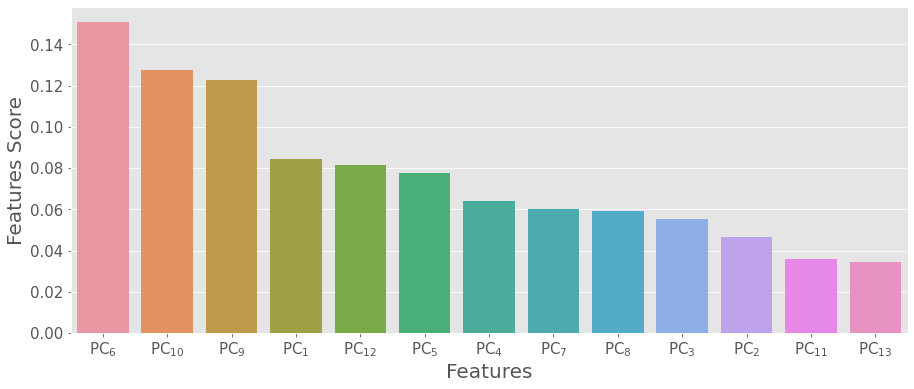

In [62]:
fig = plt.figure(figsize=(15, 6))

ax = sns.barplot(x="Features", y="Importance", data=imp)
#ax.axhline(0.125, color='b', lw=3)

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Features', fontsize = 20)
plt.ylabel('Features Score', fontsize = 20)
plt.tick_params(axis='both', labelsize = 15)
plt.tick_params(axis='x', rotation = 0)
#plt.ylim(0, 0.2);

# Reduce Model

In [63]:
regressors = []
MSE_train  = []
MAE_train  = []
R2_train   = []

MSE_test   = []
MAE_test   = []
R2_test    = []

for n in range(len(imp)):
    regressors.append(n)
    regressor = list(imp['Features'][0:n+1])
    features = x_pca_13[regressor]
    
    X_train0, X_test0, y_train0, y_test0 = train_test_split(features, y, test_size=0.3, random_state=1)
    #loaded_model = pkl.load(open('/content/drive/MyDrive/ColabNotebooks/Fourth_Pass: Ale_DataBase/ML_model.sav', 'rb'))
    #result = loaded_model.score(X_test, Y_test)

    gs = pkl.load(open('/content/drive/MyDrive/ColabNotebooks/Fourth_Pass: Ale_DataBase/ML_model.sav', 'rb'))   
    gs.fit(X_train0, y_train0)

    y_pred_train0 = gs.predict(X_train0)
    y_pred_test0  = gs.predict(X_test0)

    MSE_train0 = mean_squared_error(y_train0, y_pred_train0) ** 0.5
    MSE_test0  = mean_squared_error(y_test0, y_pred_test0) ** 0.5
    MAE_train0 = mean_absolute_error(y_train0, y_pred_train0)
    MAE_test0  = mean_absolute_error(y_test0, y_pred_test0)
    r20_train0 = r2_score(y_train0, y_pred_train0)
    r20_test0  = r2_score(y_test0, y_pred_test0)
    
    MSE_train.append(MSE_train0)
    MAE_train.append(MAE_train0)
    R2_train.append(r20_train0)
    
    MSE_test.append(MSE_test0)
    MAE_test.append(MAE_test0)
    R2_test.append(r20_test0)



In [64]:
regressors = [x+1 for x in regressors]
regressors

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [65]:
min(MAE_test)-5.0

4.536973320717873

''

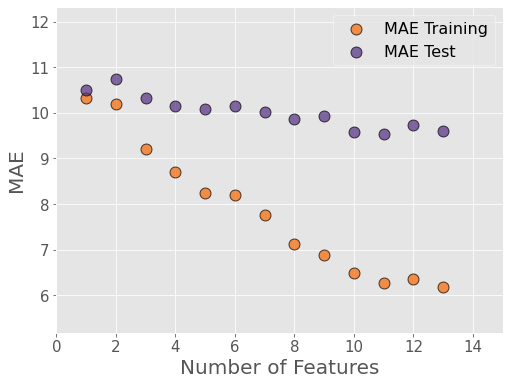

In [66]:
fig = plt.figure(figsize=(8, 6))

plt.scatter(regressors, MAE_train, s=120, c='#F56600', alpha=0.7, edgecolors='k', linewidths=1, label='MAE Training')
plt.scatter(regressors, MAE_test, s=120, c='#522D80', alpha=0.7, edgecolors='k', linewidths=1, label='MAE Test')

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

plt.xlabel('Number of Features', fontsize = 20)
plt.ylabel('MAE', fontsize = 20)

plt.tick_params(axis='both', labelsize = 15)
plt.legend(loc='upper right', fontsize = 16, ncol = 1).get_frame().set_edgecolor('w')
plt.grid(True)

plt.xlim(0, 15)
plt.ylim(min(MAE_train)-1.0, max(MAE_train)+2.0)
;

(-0.06706758000540872, 1.0)

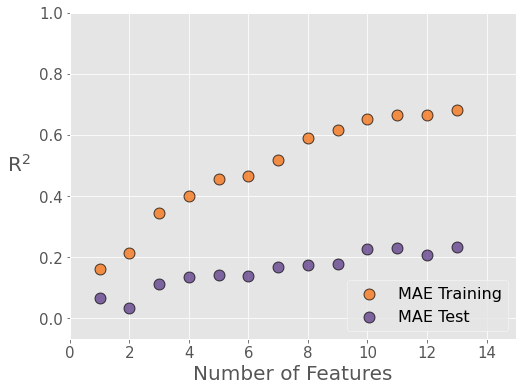

In [67]:
fig = plt.figure(figsize=(8, 6))

plt.scatter(regressors, R2_train, s=120, c='#F56600', alpha=0.7, edgecolors='k', linewidths=1, label='MAE Training')
plt.scatter(regressors, R2_test, s=120, c='#522D80', alpha=0.7, edgecolors='k', linewidths=1, label='MAE Test')

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

plt.xlabel('Number of Features', fontsize = 20)
plt.ylabel('R$^2$', fontsize = 20, rotation = 0, labelpad= 20)

plt.tick_params(axis='both', labelsize = 15)
plt.legend(loc='lower right', fontsize = 16, ncol = 1).get_frame().set_edgecolor('w')
plt.grid(True)

plt.xlim(0, 15)
plt.ylim(min(R2_test)-0.1, 1)

In [68]:
nf = 8
regressor_list = list(imp['Features'][0:nf])
#regressor_list

In [69]:
features_list = x_pca_13[regressor_list]
features_list.head()

,PC$_6$,PC$_{10}$,PC$_9$,PC$_1$,PC$_{12}$,PC$_5$,PC$_4$,PC$_7$
0,-1.473042,0.295502,-0.475275,-33583.174458,-0.951460,1.443703,-1.019406,-0.559243
1,-0.930303,-1.374768,0.900820,-33586.723020,-0.957589,1.157827,-1.027815,0.097248
2,0.105813,-1.070710,-0.544871,-33586.723039,1.340540,-0.005903,-1.455719,1.696930
3,2.485943,0.527685,2.124472,-33586.723030,-0.857977,-8.456081,4.787911,-0.586087
4,1.445395,0.600287,-1.540496,298801.119568,-1.033150,1.152366,-0.798761,0.831804


In [70]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(features_list, y, test_size=0.3, random_state=1)

In [71]:
model = pkl.load(open('/content/drive/MyDrive/ColabNotebooks/Fourth_Pass: Ale_DataBase/ML_model.sav', 'rb'))   


In [72]:
model.fit(X_train1, y_train1)

XGBRegressor(colsample_bylevel=0.7407875862169556,
             colsample_bytree=0.8264897419467259, gamma=0.31243261075819717,
             learning_rate=0.8394875424459604, max_delta_step=4, max_depth=11,
             min_child_weight=4, missing=nan, objective='reg:squarederror',
             reg_alpha=2.9710507268423365, reg_lambda=812, scale_pos_weight=396,
             subsample=0.6575779051598305)

In [73]:
#best1 = model.best_estimator_

y_pred_train1 = model.predict(X_train1)
y_pred_test1  = model.predict(X_test1)

MSE_train1 = mean_squared_error(y_train1, y_pred_train1) ** 0.5
MSE_test1  = mean_squared_error(y_test1, y_pred_test1) ** 0.5
MAE_train1 = mean_absolute_error(y_train1, y_pred_train1)
MAE_test1  = mean_absolute_error(y_test1, y_pred_test1)
R2_train1 = r2_score(y_train1, y_pred_train1)
R2_test1  = r2_score(y_test1, y_pred_test1)

print(MSE_train1)
print(MAE_train1)
print(R2_train1)
print('\n')
print(MSE_test1)
print(MAE_test1)
print(R2_test1)

10.054366711429928
7.121038690914725
0.5890042395400601


13.18664667094516
9.86224071039417
0.17296062318875338


The rmse train: 10.054366711429928
The rmse test: 13.18664667094516
The MAE train: 7.121038690914725
The MAE test: 9.86224071039417
The R^2 train: 0.5890042395400601
The R^2 test: 0.17296062318875338


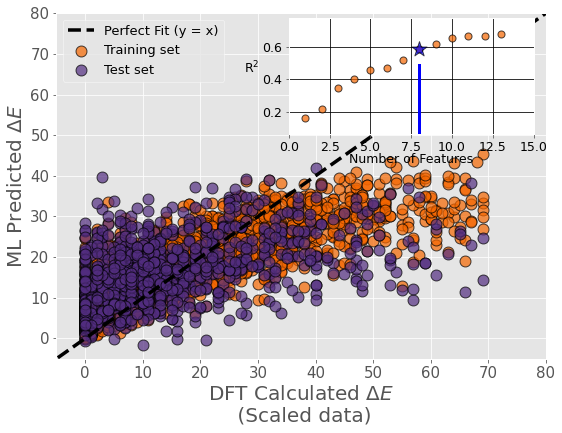

In [74]:
#y_pred_train = best.predict(X_train)
#y_pred_test = best.predict(X_test)

x_ref_line = [-10, 90]
y_ref_line = [-10, 90]

x_ref_line_2 = np.linspace(-10, 60, 100)
y_ref_line_2 = np.linspace(-10, 60, 100)

# Print Result and Output figure
x11 = np.array(y_train1)
y11 = np.array(y_pred_train1)
x21 = np.array(y_test1)
y21 = np.array(y_pred_test1)

print('The rmse train:', mean_squared_error(y_train1, y_pred_train1) ** 0.5)
print('The rmse test:', mean_squared_error(y_test1, y_pred_test1) ** 0.5)
print('The MAE train:', mean_absolute_error(y_train1, y_pred_train1))
print('The MAE test:', mean_absolute_error(y_test1, y_pred_test1))
print('The R^2 train:', r2_score(y_train1, y_pred_train1))
print('The R^2 test:', r2_score(y_test1, y_pred_test1))

fig = plt.figure(figsize=(8.5, 6))

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.48, 0.62, 0.4, 0.27]) # inset axes

z1 = np.polyfit(x11, y11, 1)
p1 = np.poly1d(z1)

# Main Plot
axes1.plot(x_ref_line, y_ref_line, 'k--', linewidth=3.5, label='Perfect Fit (y = x)')

axes1.scatter(x11, y11, s=120, c='#F56600', alpha=0.7, edgecolors='k', linewidths=1, label='Training set')
axes1.scatter(x21, y21, s=120, c='#522D80', alpha=0.7, edgecolors='k', linewidths=1, label='Test set')

axes1.set_xlabel('DFT Calculated $\Delta E$ \n (Scaled data)', fontsize = 20)
axes1.set_ylabel('ML Predicted $\Delta E$', fontsize = 20)

axes1.set_xlim(-5, 80)
axes1.set_ylim(-5, 80)

axes1.tick_params(axis='both', labelsize = 15)
axes1.legend(loc='upper left', fontsize = 13, ncol = 1).get_frame().set_edgecolor('w')
axes1.grid(True)

# Inset plot
axes2.set_facecolor('w')
axes2.scatter(regressors, R2_train, s=50, c='#F56600', alpha=0.7, edgecolors='k', linewidths=1, label='MAE Training')
axes2.scatter(regressors[nf-1], R2_train[nf-1], marker ="*", s=250, c='b', alpha=0.7, edgecolors='k', linewidths=1)

axes2.axvline(x=regressors[nf-1], 
              ymin=0, 
              ymax=R2_train[nf-1], 
              color='b', 
              lw=3
             )

axes2.set_xlabel('Number of Features', fontsize = 12.5, labelpad=-1, c='k')
axes2.set_ylabel('R$^2$', fontsize = 12.5, rotation = 0, labelpad= 10, c='k')
axes2.tick_params(axis='both', labelsize = 12.5, labelcolor='k', grid_color='k',)
axes2.grid(True, c='k')

axes2.set_xlim(0, 15)
axes2.set_ylim(min(R2_train)-0.1, max(R2_train)+0.1);

# PCA components

In [75]:
#fi_pca_comp_df = df_comp_n.iloc[[5, 8, 9, 2, 6, 0, 12, 4, 3, 7, 10, 1, 11]]
#fi_pca_comp_df.head()
#[imp.index[0:nf]]

In [76]:
fi_pca_comp_df = df_comp_n.loc[imp.index[0:nf]]
fi_pca_comp_df

,density,vpa,ewald_energy_per_atom,structural complexity per cell,MagpieData minimum Number,MagpieData maximum Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData minimum NsValence,MagpieData maximum NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData maximum NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData minimum NdUnfilled,MagpieData maximum NdUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData maximum GSbandgap,MagpieData maximum GSmagmom,HOMO_character,LUMO_character,MagpieData minimum GSbandgap MagpieData maximum GSbandgap,MagpieData minimum NUnfilled MagpieData maximum NUnfilled,MagpieData minimum NdUnfilled MagpieData maximum NdUnfilled,MagpieData minimum NpUnfilled MagpieData maximum NpUnfilled,MagpieData minimum NValence MagpieData maximum NValence,MagpieData minimum NdValence MagpieData maximum NdValence,MagpieData minimum NpValence MagpieData maximum NpValence,MagpieData minimum NsValence MagpieData maximum NsValence,MagpieData minimum Electronegativity MagpieData maximum Electronegativity,MagpieData minimum CovalentRadius MagpieData maximum CovalentRadius,MagpieData minimum Row MagpieData maximum Row,MagpieData minimum Column MagpieData maximum Column,MagpieData minimum MeltingT MagpieData maximum MeltingT,MagpieData minimum AtomicWeight MagpieData maximum AtomicWeight,MagpieData minimum MendeleevNumber MagpieData maximum MendeleevNumber,MagpieData minimum Number MagpieData maximum Number
PC$_6$,2.284960e-01,-0.073423,1.468661e-01,0.314408,2.672832e-01,0.111506,1.039390e-01,-1.383065e-01,2.759824e-01,0.106272,1.884920e-01,1.089946e-01,1.610959e-01,-1.292881e-01,1.824850e-01,0.142117,1.153583e-01,-6.057970e-02,1.134432e-01,-8.926270e-02,0.031522,-8.619223e-02,0.378160,1.150788e-01,2.864645e-01,9.239710e-02,-3.964381e-02,2.470442e-02,-3.166491e-02,2.796778e-01,6.657223e-02,8.830774e-02,8.654816e-02,-2.099878e-01,-2.818707e-06,-1.042704e-02,-2.848454e-02,-9.714532e-03,-1.591082e-02,0.006921,7.368025e-02,-6.639700e-02,-1.389033e-01,3.889148e-02,-3.484361e-04,-1.024866e-02,-1.776730e-02,-3.098934e-02,-2.890640e-02,-1.447866e-02,-4.682700e-02,-1.925644e-02,-4.338292e-02
PC$_{10}$,-1.266343e-01,0.562411,-5.928841e-01,0.020405,1.460961e-01,-0.089582,3.396293e-02,-7.699125e-02,1.518956e-01,-0.083961,5.390218e-03,-3.799112e-02,1.300673e-01,-3.941094e-02,8.182945e-02,-0.086538,3.493579e-02,6.998176e-02,2.340036e-02,-3.485996e-02,0.118199,4.745051e-02,0.110041,-3.035633e-01,1.172939e-01,-1.124577e-01,-7.462448e-02,1.056690e-01,-1.136312e-02,9.828859e-02,-4.286687e-02,6.400283e-02,-6.806796e-02,7.410391e-02,1.217890e-06,-1.105887e-02,9.602871e-04,3.634728e-02,-2.371407e-02,0.007401,-3.805925e-02,-2.878717e-02,4.147484e-02,-1.688402e-02,-8.237778e-03,3.454164e-02,-4.507081e-02,-3.699545e-02,6.279078e-03,-4.809941e-02,-4.872307e-02,-5.275097e-03,-4.381627e-02
PC$_9$,-4.531452e-02,0.161479,1.654314e-01,-0.000039,6.096772e-02,0.024121,4.253101e-02,1.616522e-01,6.345685e-02,0.023886,-1.796014e-01,-1.591015e-01,1.397738e-01,2.049373e-01,2.210224e-02,0.002534,-1.230756e-02,-2.814663e-02,3.929955e-02,4.180426e-02,-0.014938,7.849830e-02,0.209005,2.406467e-01,1.252915e-01,6.828066e-02,2.523141e-03,6.137314e-02,7.256216e-02,-3.207979e-01,-1.038537e-01,-8.673313e-02,-1.234769e-01,-4.215995e-03,7.984244e-07,9.236261e-03,2.544160e-02,2.615350e-01,-2.187157e-03,0.024008,-2.785205e-01,2.837551e-02,-7.938365e-02,3.125082e-01,2.919050e-02,3.917729e-01,-1.557902e-01,-8.319442e-02,1.987879e-01,-1.138362e-02,-1.021020e-

In [77]:
#list(imp.index)

In [78]:
#fi_pca_comp_df.set_axis([imp.index], inplace=True)
#fi_pca_comp_df

Text(183.7, 0.5, 'PCA Features')

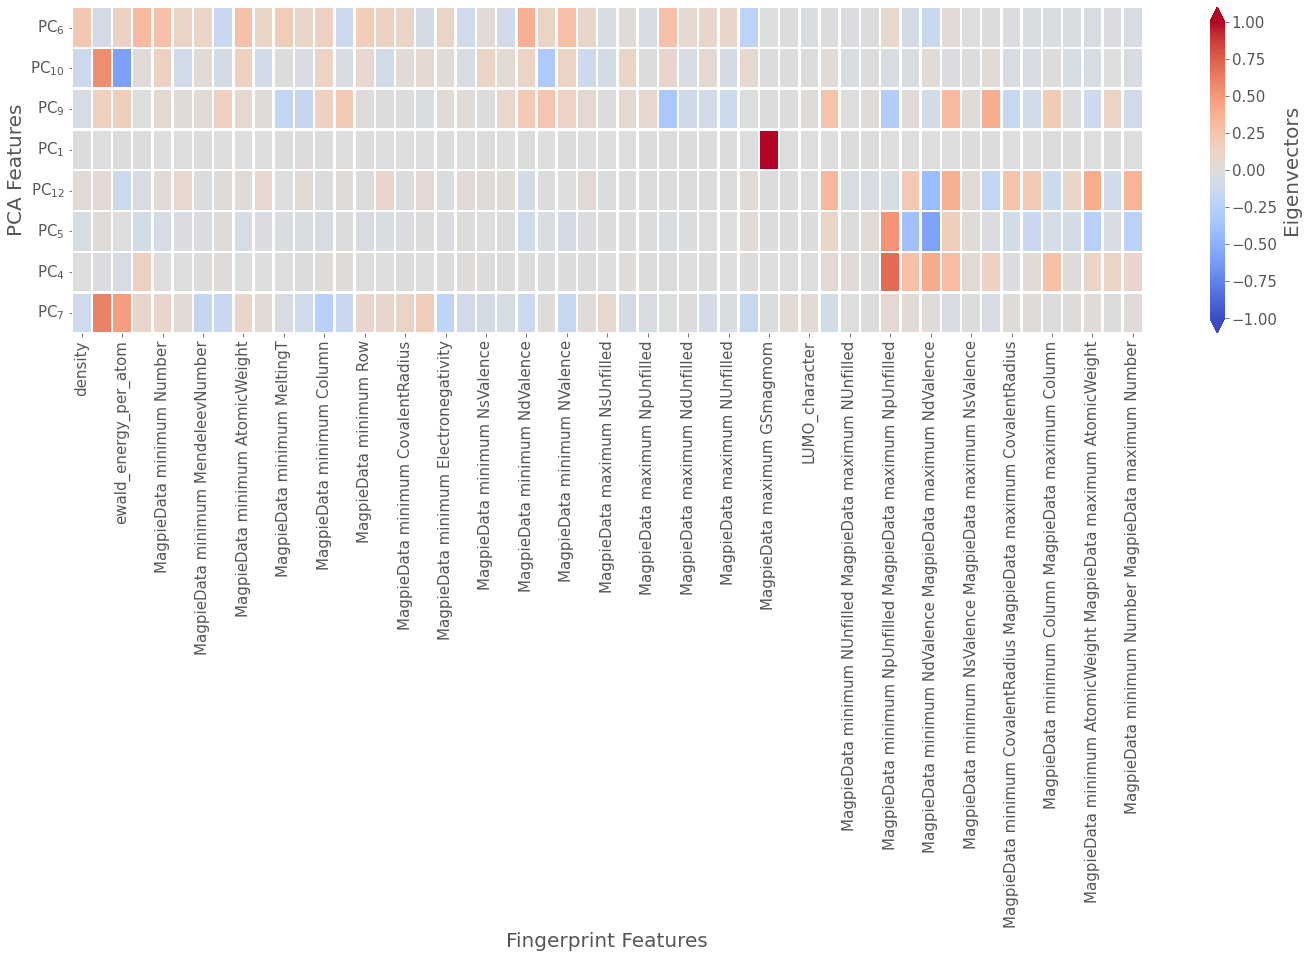

In [79]:
f, ax = plt.subplots(figsize=(24, 6))
ax = sns.heatmap(fi_pca_comp_df, 
                 cmap='coolwarm', 
                 linecolor='white', 
                 linewidths=1.5, 
                 vmin=-1.00, 
                 vmax= 1.00, 
                 cbar_kws={'label': 'Eigenvectors', 'extend': 'both', 'shrink':1.0}
                 )

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
ax.figure.axes[-1].yaxis.label.set_size(20)

ax = plt.gca()
#ax.axes.xaxis.set_visible(False)
ax.yaxis.set_tick_params(labelsize=15, labelrotation=0)
ax.xaxis.set_tick_params(labelsize=15, labelrotation=90)
plt.xlabel('Fingerprint Features', fontsize=20)
plt.ylabel('PCA Features', fontsize=20)
#f.savefig('PCA_Eigenvectors_DeltaE.png', bbox_inches='tight', dpi=400);

In [80]:
palette1 = sns.color_palette("Spectral")

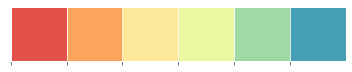

In [81]:
sns.palplot(palette1)

In [82]:
palette2 = sns.diverging_palette(45, 300, s=60)

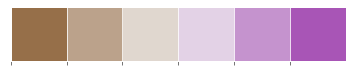

In [83]:
sns.palplot(palette2)

In [84]:
list(fi_pca_comp_df.columns)

['density',
 'vpa',
 'ewald_energy_per_atom',
 'structural complexity per cell',
 'MagpieData minimum Number',
 'MagpieData maximum Number',
 'MagpieData minimum MendeleevNumber',
 'MagpieData maximum MendeleevNumber',
 'MagpieData minimum AtomicWeight',
 'MagpieData maximum AtomicWeight',
 'MagpieData minimum MeltingT',
 'MagpieData maximum MeltingT',
 'MagpieData minimum Column',
 'MagpieData maximum Column',
 'MagpieData minimum Row',
 'MagpieData maximum Row',
 'MagpieData minimum CovalentRadius',
 'MagpieData maximum CovalentRadius',
 'MagpieData minimum Electronegativity',
 'MagpieData maximum Electronegativity',
 'MagpieData minimum NsValence',
 'MagpieData maximum NpValence',
 'MagpieData minimum NdValence',
 'MagpieData maximum NdValence',
 'MagpieData minimum NValence',
 'MagpieData maximum NValence',
 'MagpieData maximum NsUnfilled',
 'MagpieData minimum NpUnfilled',
 'MagpieData maximum NpUnfilled',
 'MagpieData minimum NdUnfilled',
 'MagpieData maximum NdUnfilled',
 'Magpi

In [85]:
Electronic_PFs = ['ewald_energy_per_atom', 
                  'MagpieData minimum Number', 
                  'MagpieData maximum Number', 
                  'MagpieData minimum MendeleevNumber', 
                  'MagpieData maximum MendeleevNumber', 
                  'MagpieData minimum AtomicWeight', 
                  'MagpieData maximum AtomicWeight', 
                  'MagpieData minimum Column', 
                  'MagpieData maximum Column', 
                  'MagpieData minimum Row', 
                  'MagpieData maximum Row', 
                  'MagpieData minimum Electronegativity', 
                  'MagpieData maximum Electronegativity', 
                  'MagpieData minimum NsValence', 
                  'MagpieData maximum NpValence', 
                  'MagpieData minimum NdValence', 
                  'MagpieData maximum NdValence', 
                  'MagpieData minimum NValence', 
                  'MagpieData maximum NValence', 
                  'MagpieData maximum NsUnfilled', 
                  'MagpieData minimum NpUnfilled', 
                  'MagpieData maximum NpUnfilled', 
                  'MagpieData minimum NdUnfilled', 
                  'MagpieData maximum NdUnfilled', 
                  'MagpieData minimum NUnfilled', 
                  'MagpieData maximum NUnfilled', 
                  'MagpieData maximum GSbandgap', 
                  'MagpieData maximum GSmagmom', 
                  'HOMO_character', 
                  'LUMO_character', 
                  'MagpieData minimum GSbandgap MagpieData maximum GSbandgap', 
                  'MagpieData minimum NUnfilled MagpieData maximum NUnfilled', 
                  'MagpieData minimum NdUnfilled MagpieData maximum NdUnfilled', 
                  'MagpieData minimum NpUnfilled MagpieData maximum NpUnfilled', 
                  'MagpieData minimum NValence MagpieData maximum NValence', 
                  'MagpieData minimum NdValence MagpieData maximum NdValence', 
                  'MagpieData minimum NpValence MagpieData maximum NpValence', 
                  'MagpieData minimum NsValence MagpieData maximum NsValence', 
                  'MagpieData minimum Electronegativity MagpieData maximum Electronegativity', 
                  'MagpieData minimum Row MagpieData maximum Row', 
                  'MagpieData minimum Column MagpieData maximum Column', 
                  'MagpieData minimum AtomicWeight MagpieData maximum AtomicWeight', 
                  'MagpieData minimum MendeleevNumber MagpieData maximum MendeleevNumber', 
                  'MagpieData minimum Number MagpieData maximum Number'
                  ]

In [86]:
Crystal_PFs = ['density', 
               'vpa', 
               'structural complexity per cell', 
               ]

In [87]:
Size_PFs = ['MagpieData minimum CovalentRadius', 
            'MagpieData maximum CovalentRadius', 
            'MagpieData minimum CovalentRadius MagpieData maximum CovalentRadius',
            ]

In [88]:
Bulk_PFs = ['MagpieData minimum MeltingT', 
            'MagpieData maximum MeltingT', 
            'MagpieData minimum MeltingT MagpieData maximum MeltingT'
            ]

In [89]:
# Create dictionary with features as keys and colors as values
PF_color_dict = {}
for col in fi_pca_comp_df.columns:
    if col in Electronic_PFs:
        PF_color_dict[col] = palette1[0]
    elif col in Crystal_PFs:
        PF_color_dict[col] = palette1[1]
    elif col in Size_PFs:
        PF_color_dict[col] = palette1[4]
    else:
        PF_color_dict[col] = palette1[5]
# Convert the dictionary into a Series
PF_colors = pd.Series(PF_color_dict)
PF_colors.head()

density                           (0.9873125720876587, 0.6473663975394078, 0.364...
vpa                               (0.9873125720876587, 0.6473663975394078, 0.364...
ewald_energy_per_atom             (0.8853517877739331, 0.3190311418685121, 0.290...
structural complexity per cell    (0.9873125720876587, 0.6473663975394078, 0.364...
MagpieData minimum Number         (0.8853517877739331, 0.3190311418685121, 0.290...
dtype: object

In [90]:
PF = ['ewald_energy_per_atom', 
                  'MagpieData minimum Number', 
                  'MagpieData maximum Number', 
                  'MagpieData minimum MendeleevNumber', 
                  'MagpieData maximum MendeleevNumber', 
                  'MagpieData minimum AtomicWeight', 
                  'MagpieData maximum AtomicWeight', 
                  'MagpieData minimum Column', 
                  'MagpieData maximum Column', 
                  'MagpieData minimum Row', 
                  'MagpieData maximum Row', 
                  'MagpieData minimum Electronegativity', 
                  'MagpieData maximum Electronegativity', 
                  'MagpieData minimum NsValence', 
                  'MagpieData maximum NpValence', 
                  'MagpieData minimum NdValence', 
                  'MagpieData maximum NdValence', 
                  'MagpieData minimum NValence', 
                  'MagpieData maximum NValence', 
                  'MagpieData maximum NsUnfilled', 
                  'MagpieData minimum NpUnfilled', 
                  'MagpieData maximum NpUnfilled', 
                  'MagpieData minimum NdUnfilled', 
                  'MagpieData maximum NdUnfilled', 
                  'MagpieData minimum NUnfilled', 
                  'MagpieData maximum NUnfilled', 
                  'MagpieData maximum GSbandgap', 
                  'MagpieData maximum GSmagmom', 
                  'HOMO_character', 
                  'LUMO_character', 
      'density', 
               'vpa', 
               'structural complexity per cell', 
      'MagpieData minimum CovalentRadius', 
            'MagpieData maximum CovalentRadius', 
      'MagpieData minimum MeltingT', 
            'MagpieData maximum MeltingT'
      ]

In [91]:
EPF = ['MagpieData minimum GSbandgap MagpieData maximum GSbandgap', 
                  'MagpieData minimum NUnfilled MagpieData maximum NUnfilled', 
                  'MagpieData minimum NdUnfilled MagpieData maximum NdUnfilled', 
                  'MagpieData minimum NpUnfilled MagpieData maximum NpUnfilled', 
                  'MagpieData minimum NValence MagpieData maximum NValence', 
                  'MagpieData minimum NdValence MagpieData maximum NdValence', 
                  'MagpieData minimum NpValence MagpieData maximum NpValence', 
                  'MagpieData minimum NsValence MagpieData maximum NsValence', 
                  'MagpieData minimum Electronegativity MagpieData maximum Electronegativity', 
                  'MagpieData minimum Row MagpieData maximum Row', 
                  'MagpieData minimum Column MagpieData maximum Column', 
                  'MagpieData minimum AtomicWeight MagpieData maximum AtomicWeight', 
                  'MagpieData minimum MendeleevNumber MagpieData maximum MendeleevNumber', 
                  'MagpieData minimum Number MagpieData maximum Number']

In [92]:
# Create dictionary with features as keys and colors as values
EPF_color_dict = {}
for col in fi_pca_comp_df.columns:
    if col in PF:
        EPF_color_dict[col] = palette2[0]
    else:
        EPF_color_dict[col] = palette2[5]
# Convert the dictionary into a Series
EPF_colors = pd.Series(EPF_color_dict)
EPF_colors.head()

density                           (0.5915940537502231, 0.4353035127359776, 0.287...
vpa                               (0.5915940537502231, 0.4353035127359776, 0.287...
ewald_energy_per_atom             (0.5915940537502231, 0.4353035127359776, 0.287...
structural complexity per cell    (0.5915940537502231, 0.4353035127359776, 0.287...
MagpieData minimum Number         (0.5915940537502231, 0.4353035127359776, 0.287...
dtype: object

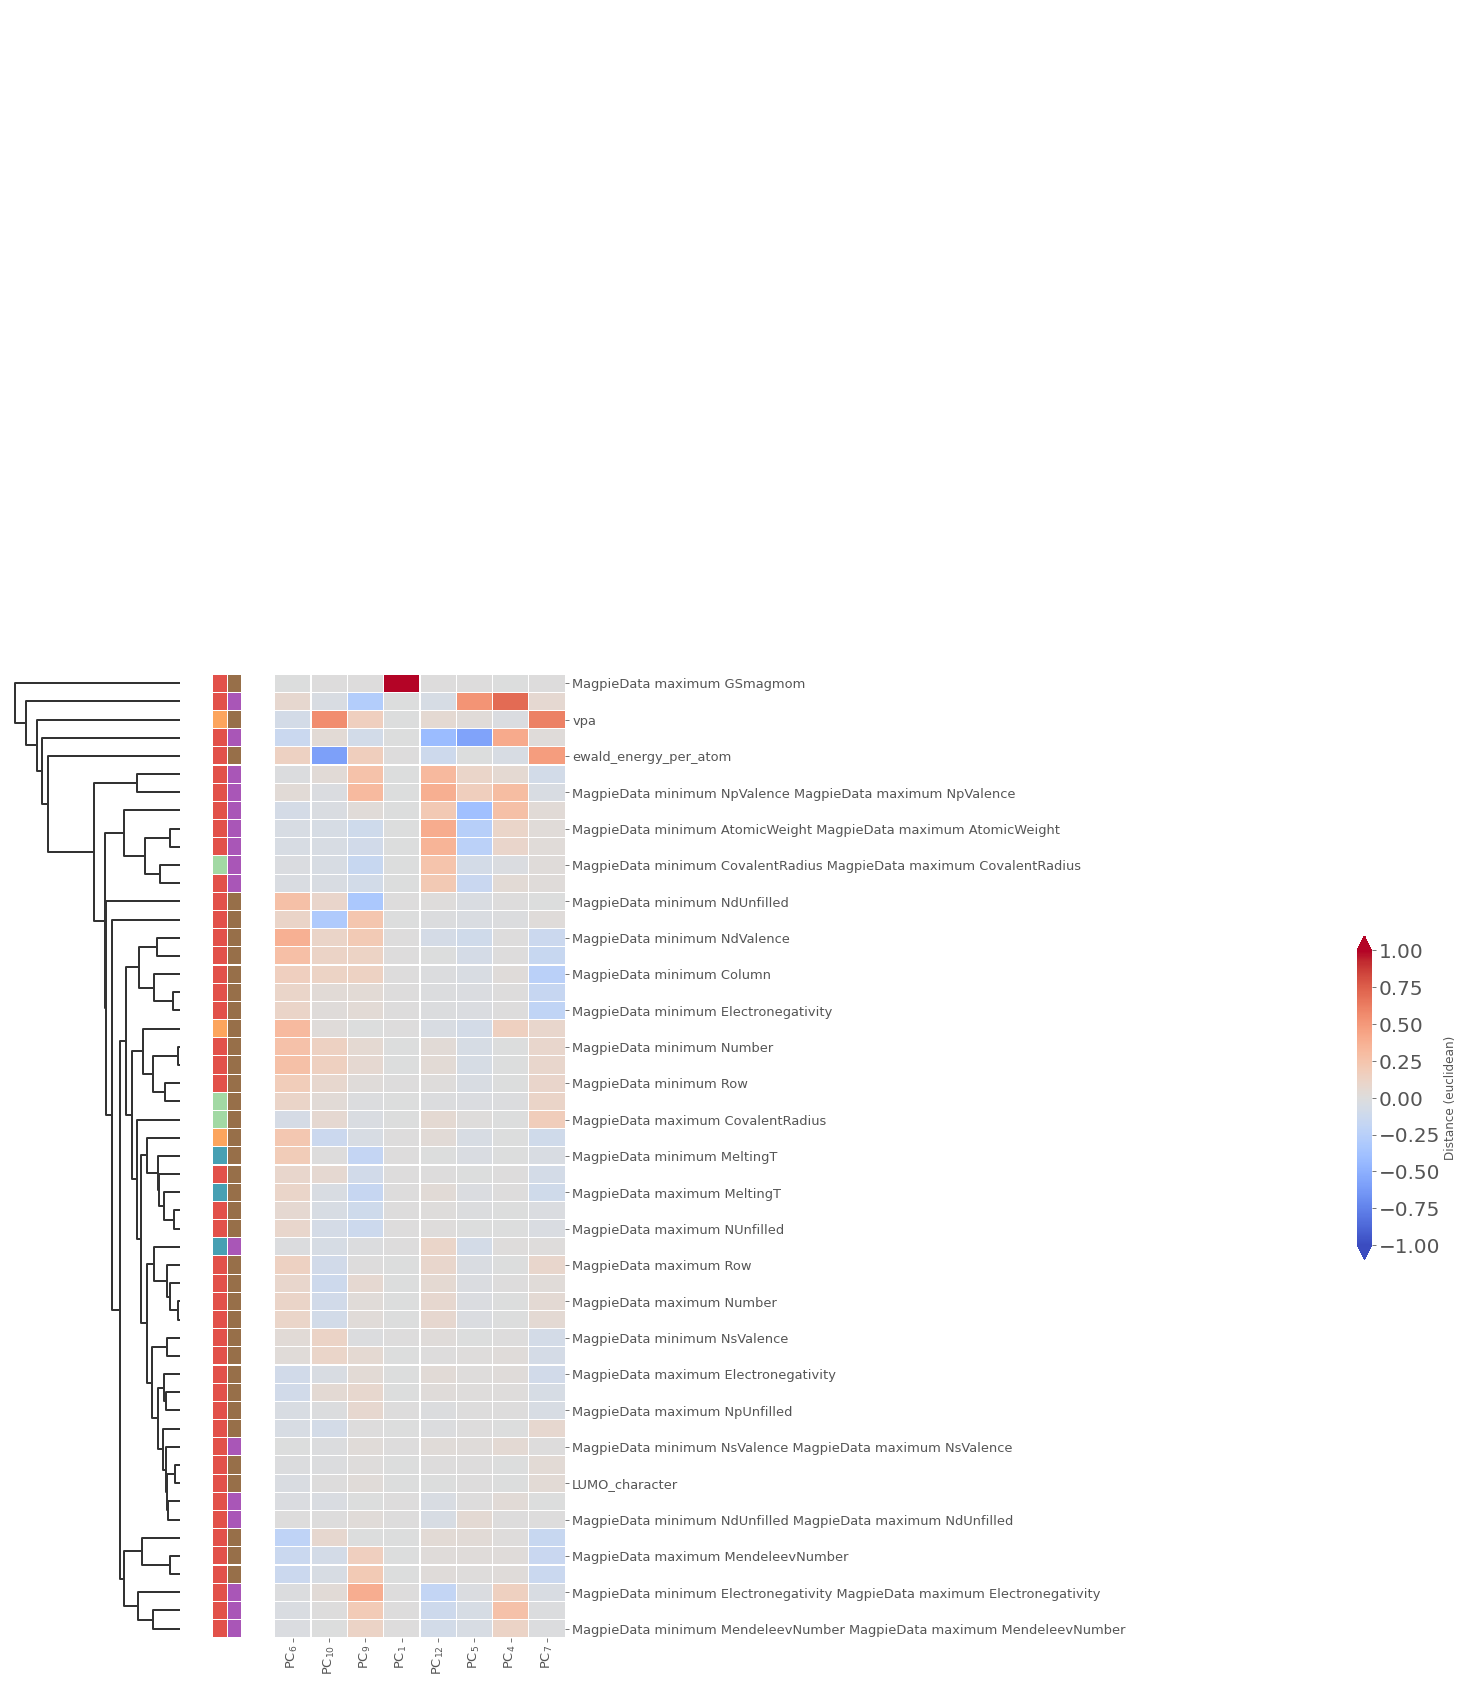

In [93]:
g = sns.clustermap(fi_pca_comp_df.T, 
                   method='average', 
                   metric='euclidean', 
                   cmap='coolwarm', 
                   vmin=-1.00, 
                   vmax= 1.00, 
                   cbar_pos=(2.00, 0.30, 0.02, 0.15), 
                   col_cluster=False, 
                   row_cluster=True, 
                   figsize=(10, 30), 
                   annot=False, 
                   linewidths=0.1, 
                   dendrogram_ratio=0.35, 
                   tree_kws=dict(linewidths=2.0), 
                   cbar_kws={'label': 'Distance (euclidean)', 
                             'extend': 'both', 
                             'shrink':0.7, 
                             'aspect':30},
                   row_colors=[PF_colors, EPF_colors]
                  )

g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), rotation=90, fontsize = 13)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 13);
#g.savefig('Dendrograms_DeltaE.png', bbox_inches='tight', dpi=400);